# 

# Analyse van de Impact van Filmeigenschappen op de Omzet

##### Door
### Agus van Huut, Tobias de Vries, Susan Bruggeling
---
- Gekozen dataset: Film
- Targetvariable: gross/omzet
- Gekozen featurevariabelen: num_voted_users, title_year, budget, movie_feesboek_likes, imdb_score

**Onderzoeksvragen:**
1. _In hoeverre is de omzet van een film te voorspellen op basis van de populariteit op Facebook en IMDB?_
2. _In hoeverre kan je voorspellen dat een film een oscar wint op basis van een aantal kenmerken van de film?_
2. _In hoeverre is de omzet van een film te voorspellen op basis van kenmerken die bekend zijn voor het uitbrengen van een film? (Link met mojo) moet met knn_
3. _In hoeverre is het mogelijk om logische clusters te vinden o.b.v. onder andere budget en omzet? Denk aan blockbusters (hoog budget en hoge omzet), flops (hoog budget en lage omzet) of cultfilms (laag budget en hoge omzet). Je mag extra features toevoegen._ **todo: formateer deze vraag**

extra:
Is er een correlatie te vinden tussen het uitgeefjaar van een film en het genre. 

extra in hoeverre is de rating van een film te voorspellen op basis van een film  kolom met een boolean ipv van een tekstveld met meerdere genres
- datatypes veranderen naar het geschikte datatype (zie nieuwe cel onder business understanding)
- uitleg mark variabel jaar: kijk naar verschillende manieren (uitschieters verwijderen/houden, inflatie meerekenen/negeren om te zien wat de beste resultaten geeft)


gekozen variabelen:

- num_ciritic_for_reviews : A 

- num_user_for_review : S

- imdb_score T

- movie_facebook_likes S

- budget: agus

- gross: agus

- title year: tobias

- num_voted_users: Susan

- genre: tobias

## Business Understanding

De film industrie is gigantisch, met heel veel consumenten. Het maken van een film is een grote onderneming die veel geld kost. Als het product flopt - veel minder opbrengt dan de film heeft gekost, zijn de verliezen groot. Het is daarom belangrijk voor investeerders om de kans op een populair product te vergroten. Deze investeerders zijn dus een belangrijke stakeholder als het gaat om het analyseren van films. Dit is voornamelijk het geval wanneer de analyse betrekking heeft tot de populariteit en de opbrengsten. 

Daarnaast is en relatief groot deel van de consumenten is erg betrokken bij het product. Daarom zijn ook relatief veel consumenten van films geïnteresseerd. Analyses van deze sector kunnen veel publiek trekken, wat ook zeer waardevol kan zijn.

## Data Understanding

Het is van belang te weten welke data tot beschikking is. Hieronder voeren we eerst een analyse uit voor de gehele verzameling. Op basis van deze kleine analyse kiezen we een aantal variabelen die ons interessant lijken. Na dit onderdeel gaan we een analyse uitvoeren op per iedere gekozen variabele.

Het is ook belangrijk af te gaan welke aannamens wij over de data hebben gedaan en te controleren of deze correct zijn of niet. Wij hebben het vermoeden dat deze dataset bevooroordeeld en geen goede weerspiegeling van de werkelijkheid is. Onze aanname is dat de meeste films in de dataset een tamelijk grote bekendheid hebben. Daarnaast denken wij ook dat bekendheid gecorreleerd is met succes. Dit zou betekenen dat onze dataset een onevenredige hoeveelheid aan succesverhalen heeft.

Het is interessant om te onderzoeken of dit ook werkelijk zo is. Als dit het geval blijkt te zijn hoeft dit niet te betekenen dat de dataset onderzoeken niet interessant is. De groep films die dan overgerepresenteerd is, films met een grote bekendheid, zijn heel interessant voor grote mediabedrijven, aangezien hun producten in deze groep vallen. 

Daarnaast is het belangrijk te weten wat de data betekent, om te begrijpen hoe de modellen werken en wat de uitkomst betekent. 

### Analyse complete dataset

In [1]:
# Command to enable 3d widgets
%matplotlib notebook 

# Imports
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
# from matplotlib_venn import venn3, venn3_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import sklearn.tree as tree

We gaan eerst kijken waar onze data uit bestaat. Dit gaan we doen door te kijken hoeveel meetwaardes er zijn en wat voor type data hier in staat.

In [2]:
# Loads the movie dataset.
movie_df = pd.read_csv("movie.csv", delimiter=",")

# Sets the amount of columns to display to max.
pd.set_option('display.max_columns', None)
movie_df.sample(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
316,Color,Brad Silberling,167.0,102.0,52.0,526.0,Anna Friel,8000.0,49392095.0,Adventure|Comedy|Sci-Fi,Will Ferrell,Land of the Lost,52029,10552,Bobb'e J. Thompson,1.0,human versus dinosaur|lizard|primate|time trav...,http://www.imdb.com/title/tt0457400/?ref_=fn_t...,224.0,English,USA,PG-13,100000000.0,2009.0,735.0,5.4,1.85,0
495,Color,Roger Christian,174.0,119.0,64.0,41.0,Michael Byrne,743.0,21471685.0,Action|Adventure|Sci-Fi,Richard Tyson,Battlefield Earth,65464,971,John Topor,0.0,alien|bad acting|pulp fiction|resistance fight...,http://www.imdb.com/title/tt0185183/?ref_=fn_t...,1308.0,English,USA,PG-13,44000000.0,2000.0,117.0,2.4,2.35,0
1079,Color,Alan J. Pakula,43.0,141.0,79.0,956.0,Julia Roberts,18000.0,100768056.0,Crime|Drama|Mystery|Thriller,Denzel Washington,The Pelican Brief,59569,30063,Tony Goldwyn,0.0,college professor|fbi|president|professor|supr...,http://www.imdb.com/title/tt0107798/?ref_=fn_t...,89.0,English,USA,PG-13,45000000.0,1993.0,8000.0,6.5,2.35,0
2772,Color,Ted Kotcheff,145.0,93.0,270.0,535.0,Brian Dennehy,13000.0,NaN,Action|Adventure|Drama,Sylvester Stallone,First Blood,172493,15192,Chris Mulkey,1.0,1980s|colonel|deputy|rambo|sheriff,http://www.imdb.com/title/tt0083944/?ref_=fn_t...,376.0,English,USA,R,14000000.0,1982.0,954.0,7.7,2.35,0
3122,Color,Joe Dante,78.0,101.0,287.0,257.0,Al Leong,745.0,29500000.0,Fantasy|Horror|Sci-Fi,Albert Brooks,Twilight Zone: The Movie,25613,1954,Vic Morrow,0.0,1940s|1960s|bar|kick the can|remake,http://www.imdb.com/title/tt0086491/?ref_=fn_t...,121.0,English,USA,PG,10000000.0,1983.0,730.0,6.5,1.85,0


De dataset bestaat uit 28 kolomen. Een groot aantal van deze kolomen zijn 

In [3]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

We kunnen aan de datatypes zien dat niet alle datatypes correct zijn. Voor veel waardes waar een integer logischer zou zijn. Ook is duidelijk dat de genres in een onbruikbaar formaat staan opgeslagen. Als we de genres willen analyseren moeten we deze eerst omzetten in een bruikbaar formaat.

Daarnaast zien we dat er een hoop missende waardes zijn onder verschillende meetwaardes. Wanneer we een van die variabelen willen gebruiken moeten we die eerst compleet maken.

Voordat we dat gaan doen, kijken we eerst naar de centrumwaardes van de verschillende meetwaardes. 

In [4]:
movie_df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


We zien dat de spreiding van facebook likes heel groot is, met waarschijnlijk veel hoge uitschieters. Dit lijkt ook het geval te zijn met het aantal gebruikers beoordelingen. Het aantal professionele beoordelingingen (num_critics_for_reviews) heeft ook hoge uitschieters, maar deze liggen minder ver van het midden af.

De duration heeft een evenredigere spreiding, al lijkt deze ook uitschieters aan de hoge kant te hebben. Aspect ratio lijkt ons niet interessant om te onderzoeken.

Het budget en de omzet hebben allebei een groot bereik, van een paar duizend tot bijna een miljard. Iets dat opvalt is dat het budget een grotere max waarde heeft dan de opbrengsten.


De correlaties tussen de verschillende meetwaardes zijn ook handig om te weten, dus die gaan we ook bekijken.

Het kan zijn dat er dubbele films in de data zitten. We gaan dit controleren

In [5]:
counts = movie_df["movie_imdb_link"].value_counts()

len(counts[counts > 1])

117

Er zijn 117 films die dubbel (of driedubbel) in de database staan.

In [6]:
movie_df = movie_df.drop_duplicates(subset=["movie_imdb_link"], keep="first")

movie_df["movie_imdb_link"].value_counts().max()

1

De dubbele waardes zijn weg.

In [7]:
counts = movie_df["movie_title"].value_counts()
len(counts[counts > 1])

2

Er zijn wel twee films met dezelfde naam. We moeten opletten dat dit niet voor problemen gaat zorgen. 

### Externe Dataset Toevoegen

Voor onderzoeksvraag 2 gaan we kijken of we kunnen voorspellen of een film een oscar gaat winnen of niet. Hiervoor hebben we een dataset met vrijwel alle uitgereikte oscars door de jaren heen. 

In [8]:
oscars = pd.read_csv("the_oscar_award.csv")

oscars.sample(10)

,year_film,year_ceremony,ceremony,category,name,film,winner
1899,1945,1946,18,MUSIC (Song),Music by Walter Kent; Lyrics by Kim Gannon,Earl Carroll Vanities,False
1865,1945,1946,18,MUSIC (Music Score of a Dramatic or Comedy Pic...,Roy Webb,The Enchanted Cottage,False
3111,1955,1956,28,SOUND RECORDING,"Metro-Goldwyn-Mayer Studio Sound Department, W...",Love Me or Leave Me,False
4719,1969,1970,42,FILM EDITING,Hugh A. Robertson,Midnight Cowboy,False
744,1938,1939,11,SHORT SUBJECT (One-reel),Metro-Goldwyn-Mayer,The Great Heart,False
1277,1942,1943,15,ACTOR IN A SUPPORTING ROLE,Walter Huston,Yankee Doodle Dandy,False
4370,1966,1967,39,COSTUME DESIGN (Black-and-White),Jocelyn Rickards,Morgan!,False
1290,1942,1943,15,ART DIRECTION (Black-and-White),"Art Direction: Max Parker, Mark-Lee Kirk; In...",George Washington Slept Here,False
4686,1969,1970,42,ACTRESS IN A SUPPORTING ROLE,Sylvia Miles,Midnight Cowboy,False
6643,1987,1988,60,MUSIC (Original Song),Music and Lyric by George Fenton and Jonas Gwa...,Cry Freedom,False


In [9]:
oscars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10395 entries, 0 to 10394
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10395 non-null  int64 
 1   year_ceremony  10395 non-null  int64 
 2   ceremony       10395 non-null  int64 
 3   category       10395 non-null  object
 4   name           10395 non-null  object
 5   film           10091 non-null  object
 6   winner         10395 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 497.5+ KB


We weten van een paar oscars niet bij welke film hij hoort. Deze kunnen we net zo goed weggooien. Daarnaast moeten we de kolom film hernoemen naar movie_title om met ons andere dataframe overeen te komen.

Daarnaast zijn er een paar films waarvan we de naam niet weten. De naam gaan we niet gebruiken als feature, dus het is zonde de hele film weg te gooien. We moeten de waarde wel opvullen als we de datasets op de titel willen linken. Daarom gaan we deze waarde vullen met "N/A".

In [10]:
movie_df["movie_title"].fillna("N/A", inplace=True)

In [11]:
counts = movie_df["movie_title"].value_counts()
counts.head()

The Host            2
Out of the Blue     2
Avatar              1
The Rose            1
Glitter             1
Name: movie_title, dtype: int64

In [12]:
oscars.dropna(how="any", inplace=True)

# Drops all oscar nominations that have not won
oscars = oscars[oscars["winner"]]

oscars.loc[(oscars["film"] == oscars["film"]) & (oscars["year_film"] != oscars["year_film"]), :].shape

(0, 7)

Er zijn geen twee films met dezelfde naam die een oscar gewonnen hebben. Hier hoeven we dus geen rekening mee te houden.

In [13]:
# Drops all oscars but one for each film.
oscars.drop_duplicates("film", keep="last", inplace=True)

oscars.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
6,1927,1928,1,ART DIRECTION,William Cameron Menzies,The Dove;,True
11,1927,1928,1,DIRECTING (Comedy Picture),Lewis Milestone,Two Arabian Knights,True
21,1927,1928,1,OUTSTANDING PICTURE,Paramount Famous Lasky,Wings,True
22,1927,1928,1,UNIQUE AND ARTISTIC PICTURE,Fox,Sunrise,True


In [14]:
# Rename column names to match meaning in new dataset.
oscars = oscars.rename({"film" : "movie_title", "winner" : "oscar"}, axis=1)
# We only select the columns we need.
oscars = oscars[["movie_title", "oscar"]]

def quick_clean(movie_data):
    """strips a string and turns all characters to lower caps."""
    return movie_data.lower().strip()

# Cleans the name of the movie title in both datasets.
oscars["movie_title"] = oscars["movie_title"].apply(quick_clean)
movie_df["movie_title"] = movie_df["movie_title"].apply(quick_clean)

# Merges the two datasets on the movie title.
movie_df = pd.merge(movie_df, oscars, on="movie_title", how="left") 
movie_df["oscar"] = movie_df["oscar"].fillna(False)

print(movie_df.shape)

movie_df["oscar"].isna().sum()

(4919, 29)


0

In [15]:
counts = movie_df["movie_title"].value_counts()
counts.head()

the dead zone                                       2
the host                                            2
out of the blue                                     2
avatar                                              1
the haunting in connecticut 2: ghosts of georgia    1
Name: movie_title, dtype: int64

In [16]:
movie_df[movie_df["movie_title"] == "the dead zone"]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,oscar
2662,Color,NaN,18.0,60.0,NaN,186.0,Nicole de Boer,443.0,NaN,Drama|Fantasy|Mystery|Sci-Fi,David Ogden Stiers,the dead zone,7122,981,Chris Bruno,1.0,psychic|psychic power|psychometry|spin off|sup...,http://www.imdb.com/title/tt0281432/?ref_=fn_t...,77.0,English,Canada,TV-14,NaN,NaN,319.0,7.5,NaN,576,False
3077,Color,David Cronenberg,112.0,103.0,0.0,275.0,Herbert Lom,1000.0,NaN,Horror|Sci-Fi|Thriller,Tom Skerritt,the dead zone,44804,2013,Anthony Zerbe,0.0,car accident|coma|evil politician|psychic|vision,http://www.imdb.com/title/tt0085407/?ref_=fn_t...,182.0,English,USA,R,10000000.0,1983.0,278.0,7.2,1.85,0,False


Tot slot gaan we een heatmap van de correlatie tusssen de verschillende meetwaardes maken. Meetwaardes met hoge correlatie met budget of het winnen van een oscar, de target variabelen van de onderzoeksvragen, zijn waardevol bij het maken van een voorspellend model.

<IPython.core.display.Javascript object>


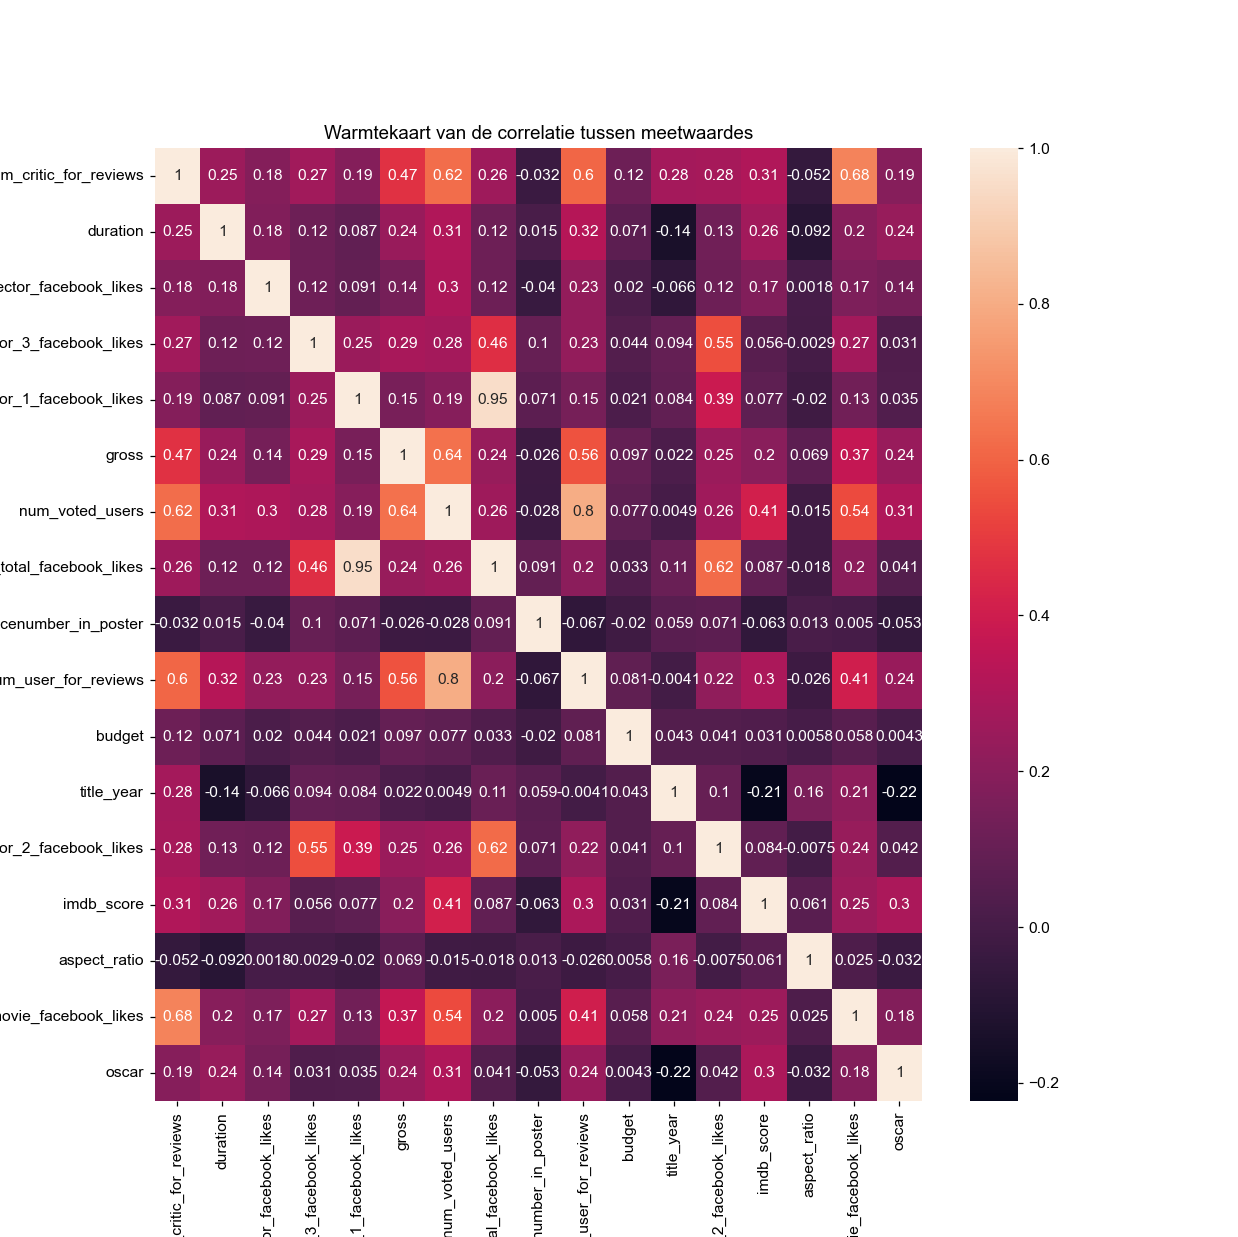

Text(0.5, 1.0, 'Warmtekaart van de correlatie tussen meetwaardes')

In [17]:
fig, ax = plt.subplots(figsize=(11,11))  

sns.heatmap(movie_df.corr(), annot=True)
plt.title("Warmtekaart van de correlatie tussen meetwaardes")

Sommige variabelen hebben vrijwel geen correlaties. Andere waardes hebben juist correlaties met meerdere andere waardes. Dit kan indicatief zijn van belangrijkere en minder belangrijke waardes voor het maken van een voorspellend model. Waardes met lage correlaties werken waarschijnlijk meer als ruis, terwijl waardes met hoge correlaties juist predicatief zijn (bron zoeken hiervoor). Daarnaast is de waarde ook indicatief van de betrouwbaarheid van het voorspellende model. Een waarde met alleen zeer zwakke correlaties zal waarschijnlijk geen sterk voorspellend model kunnen genereren. (Bron zoeken)

In [18]:
counts = movie_df["movie_title"].value_counts()
len(counts[counts > 1])

3

# Analyse en cleaning van de gekozen variabelen

We hebben drie onderzoeksvragen om te beantwoorden. Soms willen we het dataframe op een andere manier cleanen voor een andere onderzoeksvraag. Daarom splitsen we hier het dataframe op in drie. Per variabele wordt toegelicht of deze aan een van deze dataframes wordt toegewezen en wat er mee gedaan wordt. 

In [19]:
movie_sub = movie_df[['gross','budget','title_year','imdb_score','num_voted_users','genres']].copy()
movie_sub.head()

,gross,budget,title_year,imdb_score,num_voted_users,genres
0,760505847.0,237000000.0,2009.0,7.9,886204,Action|Adventure|Fantasy|Sci-Fi
1,309404152.0,300000000.0,2007.0,7.1,471220,Action|Adventure|Fantasy
2,200074175.0,245000000.0,2015.0,6.8,275868,Action|Adventure|Thriller
3,448130642.0,250000000.0,2012.0,8.5,1144337,Action|Thriller
4,NaN,NaN,NaN,7.1,8,Documentary


Voordat we de data kunnen gebruiken, moeten we die eerst opschonen. We beginnen met het wegwerken van de missende waardes van alle data die we willen gebruiken in ons model.

In [20]:
movie_df.isna().sum()

color                         19
director_name                102
num_critic_for_reviews        49
duration                      15
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        863
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               301
budget                       485
title_year                   106
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 326
movie_facebook_likes           0
oscar                          0
dtype: int64

Er zijn behoorlijk veel missende waardes. Een aantal daarvan zitten in kolomen die we niet mee nemen in dit onderzoek. Deze kunnen we het beste verwijderen.

In [21]:
cols_del = ["aspect_ratio", "cont"]

### IMDB Score 

IMDB score is de gemiddelde score die een film heeft ontvangen op de website IMDB. Op deze website kan iedereen een film beoordelen met een cijfer tussen de 1 en de 10. De IMDB score is het gemiddelde van al deze scores, afgerond op 1 punt achter de decimaal.

Deze score geeft voornamelijk aan hoeveel de kijkers de film leuk vonden. Dit kan zich vertalen naar een groter publiek, maar dat gebeurd niet altijd. In de correlatie heatmap kan je zien dat er een kleine correlatie tussen de imdb-score en de opbrengsten van de film lijkt te zijn. Daarnaast komt hij indirect genoemd in de eerste onderzoeksvraag. Daarom hebben wij ervoor gekozen om deze variabele op te schonen, zodat we het effect op het model kunnen beoordelen. 

Als de IMDB Score niet interessant blijkt voor het voorspellen van de opbrengsten van een film, blijft het een interessante variabelen, omdat er is grote interesse in het voorspellen van een goed onthaal van een film. Wij gaan in dit onderzoek verder niet in op het voorspellen van de IMDB Score.

Deze variabele is discreet, omdat de waardes altijd binnen een beperkte range vallen. Deze range is van 1 tot en met 100. Daarnaast kan de variabele zowel afhankelijk als onafhankelijk zijn. Een voorbeeld van wanneer de waarde onafhankelijk is, is wanneer je bijvoorbeeld zou kijken naar de opbrengsten van de film. Een voorbeeld van deze variabele als afhankelijk, kan zijn wanneer je de score van de film zou voorspellen op basis van bijvoorbeeld de director of de cast.

#### Analyse

<IPython.core.display.Javascript object>


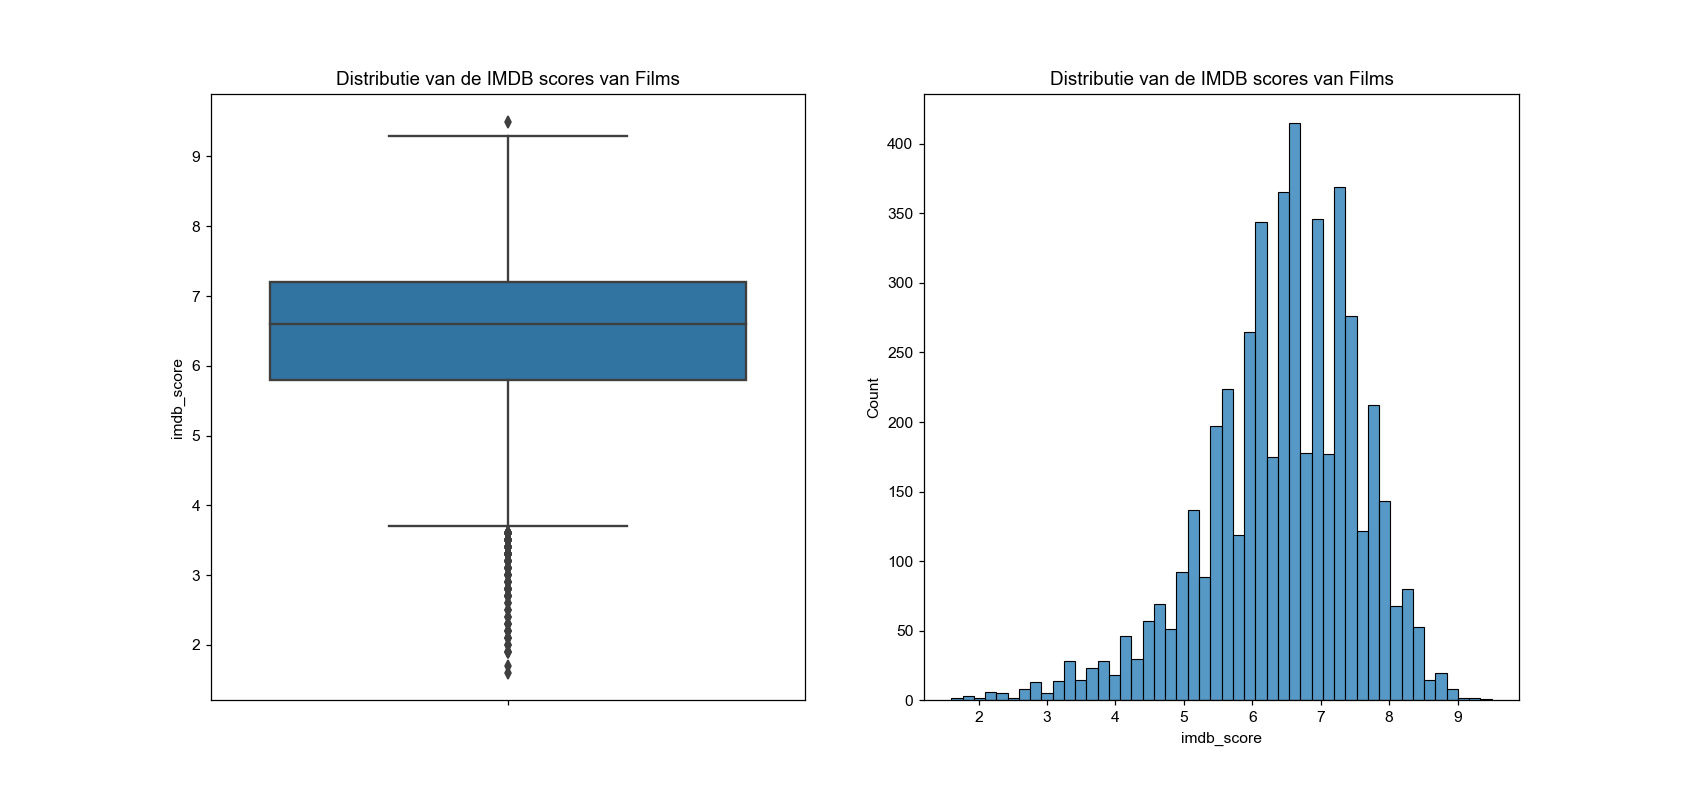

Text(0.5, 1.0, 'Distributie van de IMDB scores van Films')

In [22]:
imdb_score = movie_df["imdb_score"]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7)) 

# Plots boxplot
sns.boxplot(data=movie_df, y="imdb_score", ax=ax[0])
ax[0].set_title("Distributie van de IMDB scores van Films")

# Plots histrogram
sns.histplot(data=movie_df, x="imdb_score", ax=ax[1])
ax[1].set_title("Distributie van de IMDB scores van Films")

#### Cleaning

In [23]:
imdb_score.isna().sum()

0

Er zijn geen lege waardes voor de IMDB score. Deze is dus in ieder geval compleet. We weten al dat alle waardes in de geldige  zijn. In de histogram hebben we gezien dat alle waardes tussen de 1 en de 10 liggen. 

Ook weten we dat het datatype nu een float is, waar dit beter door een integer gerepresenteerd kan worden. De scores zijn op 1 decimaal significant, dus we moeten het product van tien en de score nemen. Dit gaan we als eerste doen.

In [24]:
movie_df["imdb_score"] = movie_df["imdb_score"] * 10
movie_df["imdb_score"] = movie_df["imdb_score"].astype(int)

movie_df["imdb_score"].info()

<class 'pandas.core.series.Series'>
Int64Index: 4919 entries, 0 to 4918
Series name: imdb_score
Non-Null Count  Dtype
--------------  -----
4919 non-null   int32
dtypes: int32(1)
memory usage: 57.6 KB


Voordat we doorgaan naar de volgende meetwaarde, gaan we de uitschieters onderzoeken. Uitschieters kunnen namelijk het voorspelend vermogen van ons model negatief beïnvloeden. 

In [25]:
outliers_imdb = movie_df[abs(stats.zscore(imdb_score)) >= 3]
outliers_imdb.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,45.000000,45.000000,45.000000,45.000000,46.000000,2.800000e+01,46.000000,46.000000,46.000000,46.000000,4.300000e+01,45.000000,45.000000,46.000000,38.000000,46.000000
mean,49.711111,94.600000,105.644444,270.511111,680.369565,1.500951e+07,19452.456522,1875.956522,1.347826,181.652174,2.001436e+07,2005.133333,412.177778,25.173913,2.376579,1687.630435
std,49.998919,15.803337,192.190856,222.721965,445.027208,1.686800e+07,25621.781510,1352.410424,2.131430,253.105179,1.998155e+07,7.310018,272.087660,3.906145,2.282101,9102.115140
min,1.000000,60.000000,0.000000,0.000000,12.000000,3.067150e+05,105.000000,12.000000,0.000000,1.000000,1.735000e+04,1981.000000,0.000000,16.000000,1.780000,0.000000
25%,9.000000,86.000000,8.000000,81.000000,461.750000,4.759968e+06,967.750000,913.000000,0.000000,19.000000,4.300000e+06,2003.000000,193.000000,22.000000,1.850000,0.000000
50%,29.000000,93.000000,49.000000,227.000000,671.000000,8.246158e+06,5361.000000,1524.000000,0.500000,62.000000,1.700000e+07,2006.000000,383.000000,27.000000,1.850000,177.000000
75%,80.000000,97.000000,92.000000,434.000000,891.500000,1.943366e+07,29313.750000,2719.750000,2.000000,300.250000,2.450000e+07,2010.000000,623.000000,28.000000,2.350000,549.500000
max,174.000000,143.000000,892.000000,782.000000,3000.000000,7.300094e+07,89687.000000,6539.000000,11.000000,1308.000000,8.400000e+07,2015.000000,919.000000,30.000000,16.000000,62000.000000


De uitschieters in de data zijn representatief voor de realiteit.

In de volgende afbeelding is de distributie van imdb scores door Tom Moertel berekent. 

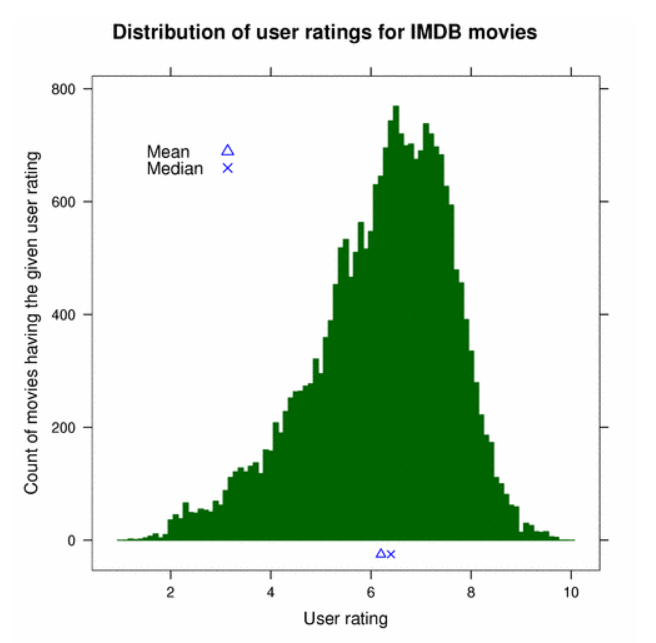

(apa bron notatie zetten!!) https://blog.moertel.com/posts/2006-01-17-mining-gold-from-the-internet-movie-database-part-1.html

De distributie die hier te zien is, is vrijwel identiek aan onze. We kunnen met meer zekerheid stellen dat onze data representatief is in dit opzicht.

### Aantal Professionele Beoordelingen

Deze waarde staat voor het aantal reviews, dit geeft aan hoeveel mensen een review hebben achtergelaten voor een film online. Attribuut num_ciritic_for_reviews is een kwalitatief feature variabel voor het onderzoeksvraag 1, dit attribuut bevat vijftig nan wij denken omdat dit een feature variabel inblaast van alle nan weg halen om te ruilen voor 0.  

bij het Cleaning hebben we gezien dat er vijftig NaN waarden bevatten. Hiernaast staan het datatype in een float dit is onnodig want aantal review kunnen niet in comma getallen zijn daarom wordt het data type verandert naar int 64. 

In [26]:
movie_df['num_critic_for_reviews'] = movie_df['num_critic_for_reviews'].fillna(0) 
# zorgt ervoor dat NaN values veranderen naar 0

In [27]:
# converting 'num_critic_for_reviews' from float to int
movie_df['num_critic_for_reviews'] = movie_df['num_critic_for_reviews'].astype(int)

<IPython.core.display.Javascript object>


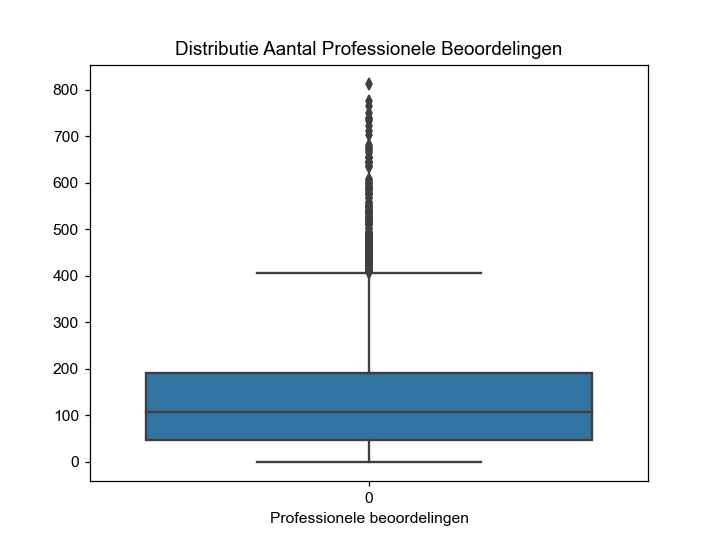

Text(0.5, 0, 'Professionele beoordelingen')

In [28]:
movie_num_critic_for_reviews = movie_df["num_critic_for_reviews"]

fig, ax = plt.subplots()
    
sns.boxplot(data=movie_num_critic_for_reviews)
ax.set_title("Distributie Aantal Professionele Beoordelingen")
ax.set_xlabel("Professionele beoordelingen")

In [29]:
movie_num_critic_for_reviews.describe()

count    4919.000000
mean      136.635495
std       120.435835
min         0.000000
25%        47.000000
50%       107.000000
75%       191.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

<IPython.core.display.Javascript object>


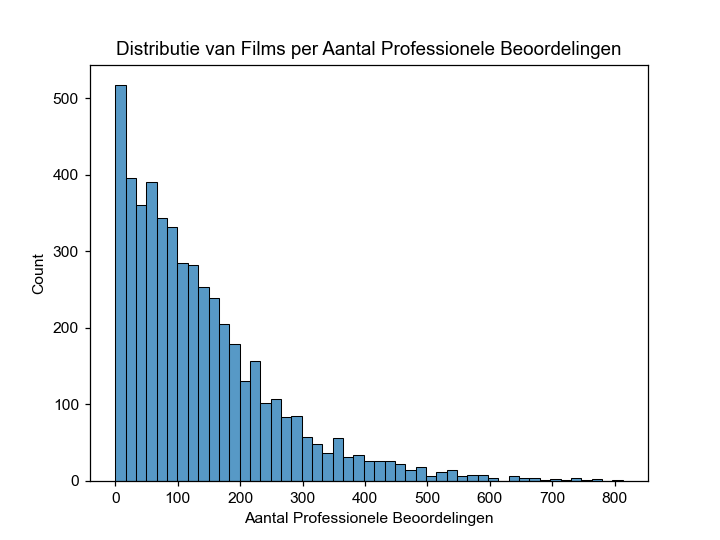

Text(0.5, 0, 'Aantal Professionele Beoordelingen')

In [30]:
fig, ax = plt.subplots()
    
sns.histplot(data=movie_num_critic_for_reviews)

ax.set_title("Distributie van Films per Aantal Professionele Beoordelingen")
ax.set_xlabel("Aantal Professionele Beoordelingen")

### Facebook Likes

Facebook likes staat voor het aantal likes die de film heeft ontvangen op zijn Facebookpagina. Facebook het meest gebruikte sociale media platform van de afgelopen decennia en staat nog steeds op nummer 1. Het aantal keren dat de film geliked is op facebook is indicatief van hoe populair hij is. 

Een blinde plek van de data is wel dat deze niet wereldwijd representatief is. Het gebruik van facebook is bijvoorbeeld illegaal in China, wat wel een grote markt is van de filmindustrie. Dit deel van de sector komt dus niet terug in deze variabele. 

Deze blinde plek is niet groot genoeg om de data erg te vertekenen. Wij denken dat deze meetwaarde erg interessant om verder te bekijken voor onderzoeksvraag 1 om de omzet te voorspellen. In de correlatie heatmap zien we dat er een correlatie tussen het aantal likes en de opbrengst te vinden is. Wij willen het effect van dit datapunt op het model die de opbrengst moet voorspellen gaan bekijken.

In de eerdere anlyse hebben we ook gezien dat het aantal facebook likes, het aantal gebruikers beoordelingen en het aantal stemmen van gebruikers erg op elkaar lijken in distributie. We gaan deze waardes samen doorzoeken. Daarom wachten we met de analyse tot we alle variabelen hebben toegelicht. 

### Aantal Stemmen - Gebruikers

Het aantal gebruikers die gestemd hebben geeft het aantal gebruikers aan die voor of tegen de film hebben gestemd op een online platform. Het is niet bekend welke platformen dit zijn. 

Deze waarde is een indicator voor de populariteit en bekendheid van een film. Aangezien de informatie van deze waarde niet platform gebonden is, is deze ook robuster met een representatievere demografie dan bijvoorbeeld de eerder aan bod gekomen aantal facebook likes.

We hebben gezien in de heatmap van de correlaties van de meetwaardes binnen de film dataset, dat deze meetwaarde een hoge correlatie heeft met de opbrengsten van de film en het winnen van een oscar. Wij denken dat dit door dezelfde redenen als toegelicht onder aantal facebook likes wordt veroorzaakt: populariteit betekend meer omzet. Een oscar nominatie betekent meer populariteit. 

### Aantal Beoordelingen door Gebruikers

Deze meetwaarde geeft het aantal beoordelingen die zijn achtergelaten door gebruikers op (online) platformen weer. 

Deze variabel heeft een zeer hoge correlatie met de omzet (Gezien in de eerder getoonde heatmap), een waarde die we willen voorspellen. Daarom gaan we deze waarde klaar maken om verder mee te werken.

We hebben eerder gezien dat er geen lege waardes voorkomen onder deze meetwaarde. Het datatype, wat nu een float is, is echter niet optimaal. Dit kunnen we beter veranderen naar een Int64. Voordat we de data gaan opschonen, gaan we eerst controleren of er nog andere onzuiverheden te vinden zijn.

#### Analyse

In [31]:
counts = movie_df["movie_title"].value_counts()
len(counts[counts > 1])

3

Het aantal facebook likes geeft iets aan over de populariteit van een film. Het zegt ook wat over de bekendheid. Een bekendere film is meestal vaker bekeken. Daarom denken wij dat er een positieve correlatie is tussen de omzet en het aantal facebook likes. Wij verwachten ook een positieve correlatie tussen het winnen van een oscar en het aantal facebook likes, omdat een oscar een film bekendheid geeft.

Hetzelfde geldt voor het aantal reviews en het aantal beoordelingen door gebruikers. Deze waardes zijn ook, in tegenstelling tot het aantal facebook likes, vrij robust tegen een vertekening van de waardes door een niet representatieve groep waaronder de data wordt verzameld. Dit komt omdat deze data over meerdere platforms wordt verzameld.

<IPython.core.display.Javascript object>


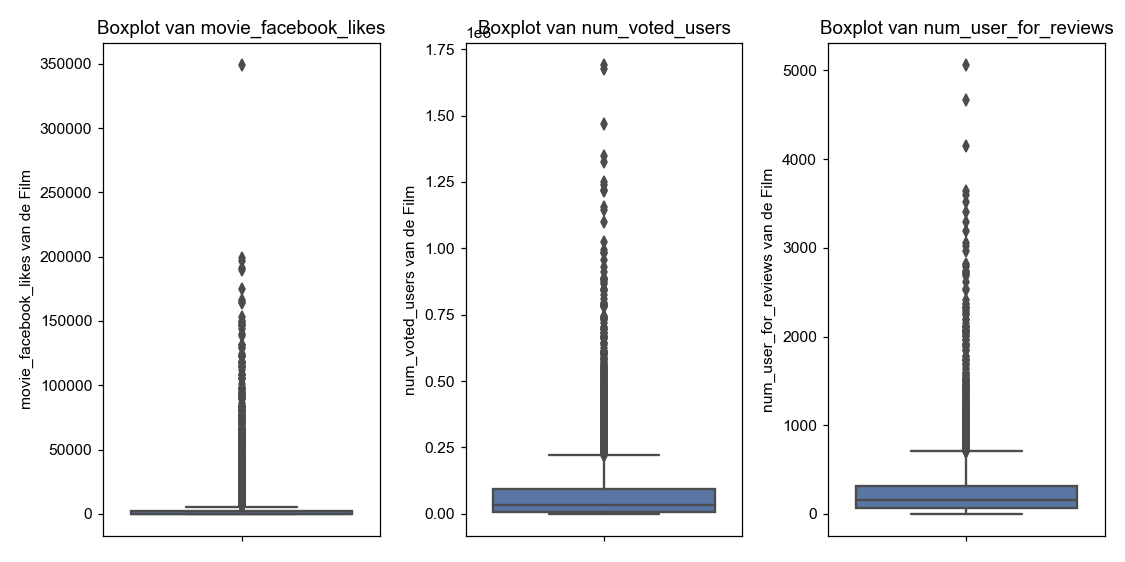

In [32]:
cols = ["movie_facebook_likes", "num_voted_users", "num_user_for_reviews"]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
sns.set_theme(style="whitegrid")

# Plots a boxplot for each column in a seperate plot.
for i, variable in enumerate(cols):
    sns.boxplot(data=movie_df, y=variable, ax=ax[i])
    ax[i].set_ylabel("{} van de Film".format(variable))
    ax[i].set_title("Boxplot van {}".format(variable))
    
plt.tight_layout()

We kunnen direct aan de boxplot zien dat er heel veel hoge uitschieters zijn. Door deze uitschieters kan je niet goed zien waar de kwartielen beginnen, maar het is duidelijk dat we niet te maken hebben met normaalverdelingen.

In [33]:
movie_df[cols].describe()

,movie_facebook_likes,num_voted_users,num_user_for_reviews
count,4919.000000,4.919000e+03,4898.000000
mean,7345.293556,8.261820e+04,267.603512
std,19200.708189,1.382858e+05,372.839155
min,0.000000,5.000000e+00,1.000000
25%,0.000000,8.356500e+03,64.000000
50%,160.000000,3.315800e+04,153.500000
75%,2000.000000,9.375750e+04,320.000000
max,349000.000000,1.689764e+06,5060.000000


Met uitzondering van het aantal gebruikers beoordelingen is het gemiddelde een paar tientallen keren groter dan de mediaan. Dit betekent dat de uitschieters de data behoorlijk beinvloeden.

<IPython.core.display.Javascript object>


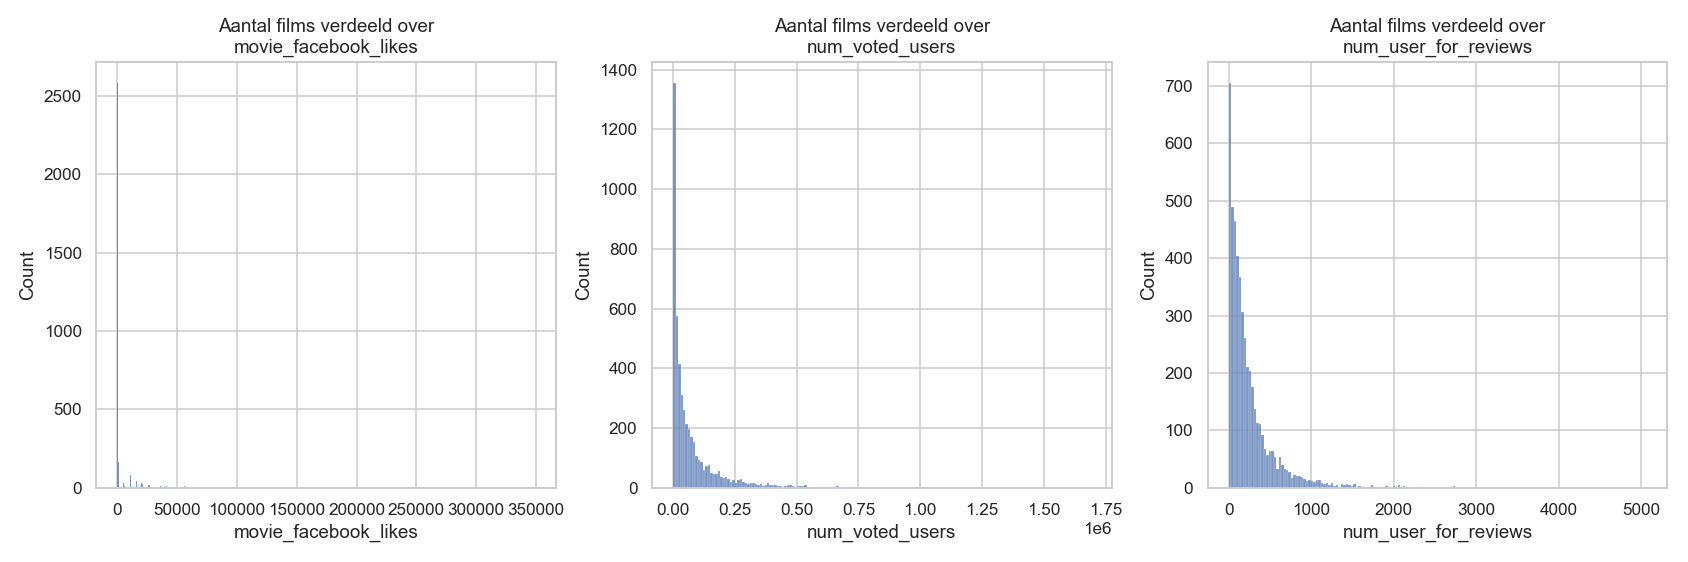

In [34]:
cols = ["movie_facebook_likes", "num_voted_users", "num_user_for_reviews"]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
sns.set_theme(style="whitegrid")

# Plots a boxplot for each column in a seperate plot.
for i, variable in enumerate(cols):
    sns.histplot(data=movie_df, x=variable, ax=ax[i])
    ax[i].set_title("Aantal films verdeeld over\n{}".format(variable))
    
plt.tight_layout()

Het aantal movie_facebook likes is heel onevenredig verdeeld. Meer dan 25 % van de data heeft de waarde 0. Wij dachten dat deze meetwaarde een goede indicator zou zijn, maar nu verwachten we er minder van. We nemen deze dataset wel mee, omdat we aan de hand van deze grafieken ook niet kunnen uitsluiten dat het indicatief kan zijn voor het budget.

Er is duidelijk sprake van een logaritmische verdeling voor alle meetwaardes. Aangezien alle meetwaardes redelijk overeen komen in de distributie van de data, ga ik onderzoeken of de uitschieters van de verschillende meetwaardes overeen komen. We hebben het vermoeden dat de groep uitschieters voornamelijk uit hele succesvolle films bestaan. Dit maakt het een interessante groep om verder te bekijken.

Het kan slim zijn nog iets te doen met het aantal facebook likes en het aantal gebruikers die gestemd hebben, aangezien die uitschieters de data erg vertekenen. Voordat we dit gaan doen, gaan we de data in zijn algemeen schoonmaken en verder analyseren.

#### Cleaning 
We kunnen ook zien dat er geen negatieve waardes zijn, of waardes die zo groot zijn dat dit duidelijk fout is. We gaan controleren of er missende waardes zijn.

In [35]:
movie_df[cols].info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4919 entries, 0 to 4918
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_facebook_likes  4919 non-null   int64  
 1   num_voted_users       4919 non-null   int64  
 2   num_user_for_reviews  4898 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 282.8 KB


Het aantal facebook likes en het aantal gebruikers die op de film gestemd hebben missen beide geen waardes. De datatypes van beide waardes is een integer, wat we ook niet hoeven te veranderen.

Voor het aantal mensen die een film hebben beoordeeld mist wel een paar waardes. Daarnaast is het datatype een float, wat we naar een integer willen veranderen. 
We gaan de missende waardes vervangen met 0. Het is aannemelijk dat de films waar we geen data over het aantal beoordelingen hebben kunnen vinden, weinig tot geen beoordelingen hebben ontvangen.

In [36]:
# Sets all NaN values to 0 in num_user_for_reviews
movie_df["num_user_for_reviews"].fillna(0, inplace=True)

# Changes datatype
movie_df["num_user_for_reviews"] = movie_df["num_user_for_reviews"].astype(int)

In [37]:
movie_df[cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4919 entries, 0 to 4918
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   movie_facebook_likes  4919 non-null   int64
 1   num_voted_users       4919 non-null   int64
 2   num_user_for_reviews  4919 non-null   int32
dtypes: int32(1), int64(2)
memory usage: 263.5 KB


In [38]:
counts = movie_df["movie_title"].value_counts()
len(counts[counts > 1])

3

We missen geen waardes meer en alle meetwaardes zijn het goede datatype.

#### Correlatie analyse
De uitschieters kunnen de data erg vertekenen als deze niet representatief van de realiteit zijn, of fouten in de data. Daarom gaan we deze verder onderzoeken. We denken dat het een groep films zijn die een groot succes waren. Zulke films komen uit, dus als ze niet worden overgerepresenteerd in onze dataset kunnen we ze beter houden.

We gaan eerst kijken naar de correlatie tussen de drie meetwaardes.

<IPython.core.display.Javascript object>


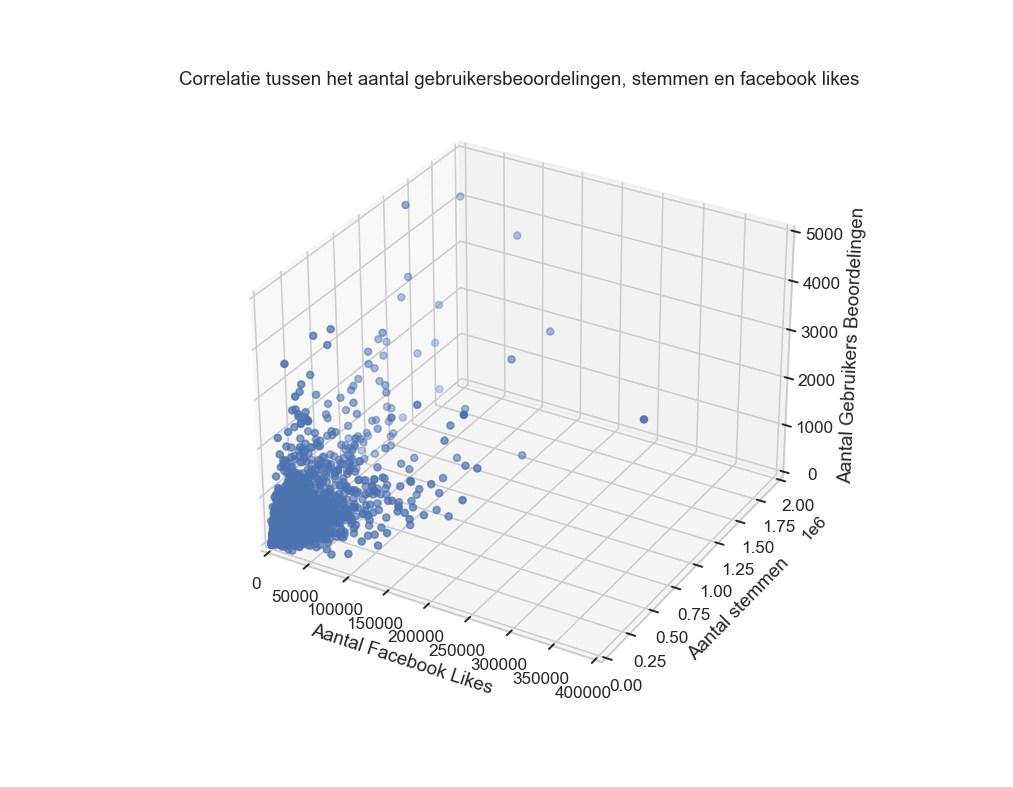

In [39]:
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "whitegrid")

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection = '3d')

x, y, z =tuple(map((lambda x : movie_df[x]), cols))

ax.set_xlabel("Aantal Facebook Likes")
ax.set_ylabel("Aantal stemmen")
ax.set_zlabel("Aantal Gebruikers Beoordelingen")
ax.set_xlim3d(0, 400000)
ax.set_ylim3d(0, 2000000)
ax.set_zlim3d(0, 5000)
ax.set_title("Correlatie tussen het aantal gebruikersbeoordelingen, stemmen en facebook likes")

ax.scatter(x, y, z)

plt.show()

Er is een correlatie te zien tussen het aantal stemmen en het aantal gebruikers beoordelingen. 

De correlatie tussen het aantal stemmen en het aantal facebook likes en de correlatie tussen het aantal gebruikers beoordelingen en het aantal facebook likes zijn een stuk zwakker.

<IPython.core.display.Javascript object>


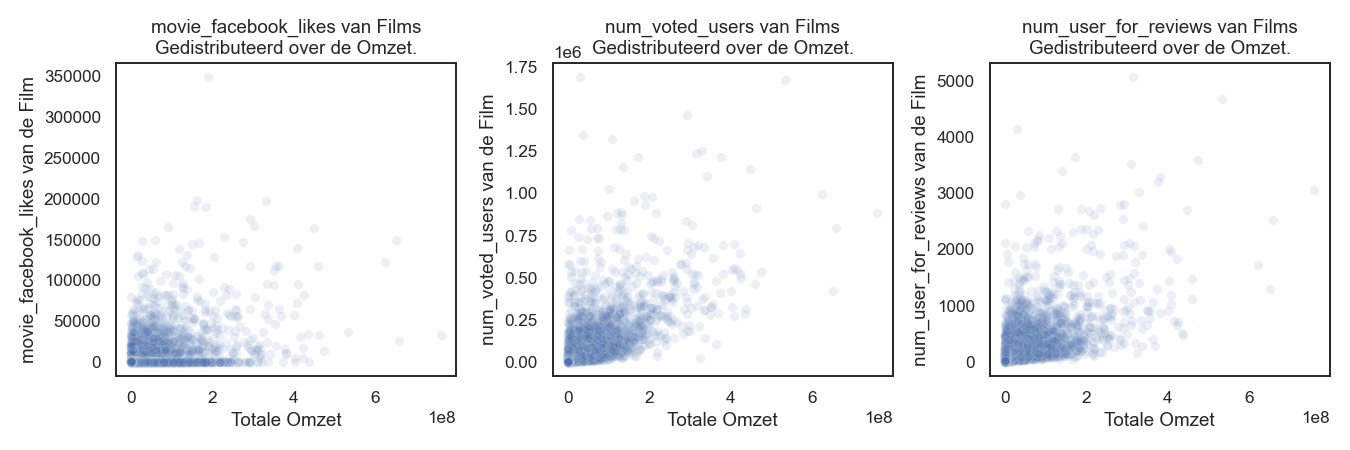

In [40]:
sns.set_theme(style="white")
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

for i, variable in enumerate(cols):
    sns.scatterplot(x="gross", y=variable,palette="muted", alpha=.1, data=movie_df, ax=ax[i])
    ax[i].set_xlabel("Totale Omzet")
    ax[i].set_ylabel("{} van de Film".format(variable))
    ax[i].set_title("{} van Films\nGedistributeerd over de Omzet.".format(variable))
    
    plt.tight_layout()

Het aantal stemmen en het aantal gebruikers beoordelingen is gecorreleerd met de omzet.

<IPython.core.display.Javascript object>


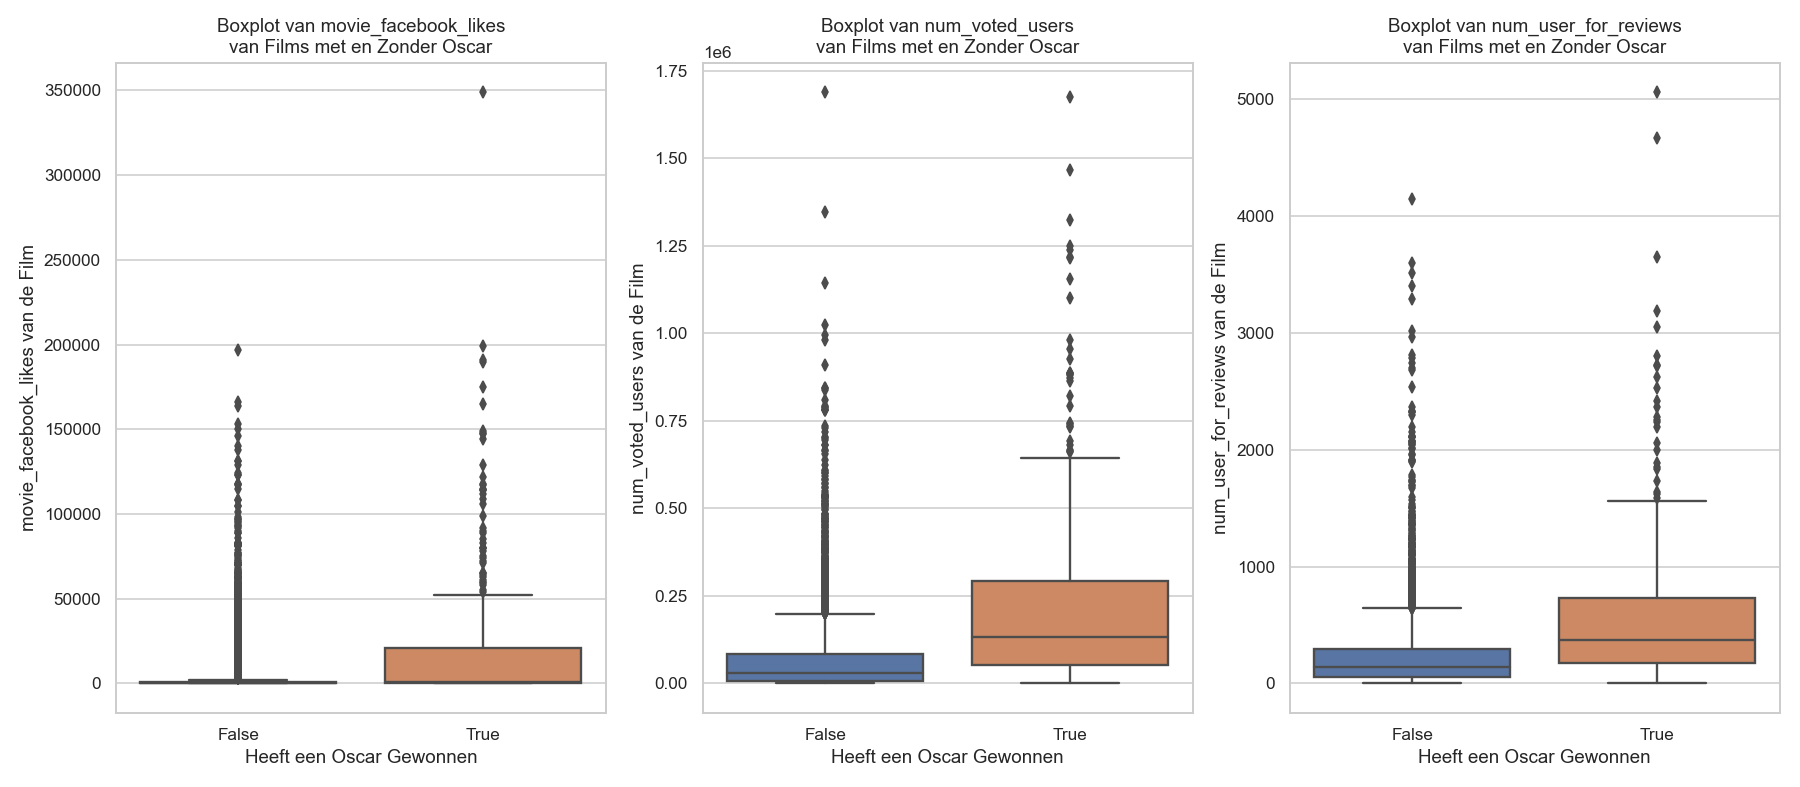

In [41]:
sns.set_theme(style="whitegrid")
fig, ax2 = plt.subplots(nrows=1, ncols=3, figsize=(16,7))

for i, variable in enumerate(cols):    
    sns.boxplot(data=movie_df, x="oscar", y=variable, ax=ax2[i])
    ax2[i].set_xlabel("Heeft een Oscar Gewonnen")
    ax2[i].set_ylabel("{} van de Film".format(variable))
    ax2[i].set_title("Boxplot van {}\nvan Films met en Zonder Oscar".format(variable))
    plt.tight_layout()

Dit volgt aardig onze verwachting. Het aantal films met een oscar hebben een hogere mediaan, gemiddelde en interkwartiel afstanden van het aantal facebook likes. Ook gaat de omzet gemiddeld omhoog naarmaten de film meer facebook likes heeft ontvangen.

De data is schoon en alle meetwaardes lijken een correlatie te hebben met beide van onze targets. Het aantal facebook likes scoort slechter voor beide targets dan de andere twee meetwaardes. 

Voordat we doorgaan met de volgende meetwaardes toelichten, willen we de groep uitschieters van deze variabelen verder bekijken. Onze voornaamste vraag is of deze uitschieters representatief voor de relatiteit zijn. Daarnaast willen we de groep verder analyseren om te kijken of hier waardevolle informatie instaat.

In [42]:
outliers = list()

for i, variable in enumerate(cols):
    outliers.append(movie_df[abs(stats.zscore(movie_df.loc[:, variable])) >= 3])
    print("{} heeft {} uitschieters".format(variable, outliers[i].shape[0]))

show_cols = cols.copy()
show_cols.append("movie_title")
show_cols.append("gross")
show_cols.append("oscar")

outliers[0].sort_values(cols[0], ascending=False).head(10)[show_cols]

movie_facebook_likes heeft 109 uitschieters
num_voted_users heeft 110 uitschieters
num_user_for_reviews heeft 98 uitschieters


,movie_facebook_likes,num_voted_users,num_user_for_reviews,movie_title,gross,oscar
96,349000,928227,2725,interstellar,187991439.0,True
293,199000,955174,1193,django unchained,162804648.0,True
10,197000,371639,3018,batman v superman: dawn of justice,330249062.0,False
128,191000,552503,1588,mad max: fury road,153629485.0,True
178,190000,406020,1188,the revenant,183635922.0,True
97,175000,1468200,2803,inception,292568851.0,True
99,166000,637246,1367,the hobbit: an unexpected journey,303001229.0,False
2577,165000,467613,608,the imitation game,91121452.0,True
3,164000,1144337,2701,the dark knight rises,448130642.0,False
275,153000,472488,1023,the martian,228430993.0,False


In [43]:
outliers[1].sort_values(cols[1], ascending=False).head(10)[show_cols]

,movie_facebook_likes,num_voted_users,num_user_for_reviews,movie_title,gross,oscar
1920,108000,1689764,4144,the shawshank redemption,28341469.0,False
66,37000,1676169,4667,the dark knight,533316061.0,True
97,175000,1468200,2803,inception,292568851.0,True
675,48000,1347461,2968,fight club,37023395.0,False
3297,45000,1324680,2195,pulp fiction,107930000.0,True
827,59000,1251222,1398,forrest gump,329691196.0,True
267,21000,1238746,5060,the lord of the rings: the fellowship of the ring,313837577.0,True
647,25000,1217752,3646,the matrix,171383253.0,True
335,16000,1215718,3189,the lord of the rings: the return of the king,377019252.0,True
3404,43000,1155770,2238,the godfather,134821952.0,True


In [44]:
outliers[2].sort_values(cols[2], ascending=False).head(10)[show_cols]

,movie_facebook_likes,num_voted_users,num_user_for_reviews,movie_title,gross,oscar
267,21000,1238746,5060,the lord of the rings: the fellowship of the ring,313837577.0,True
66,37000,1676169,4667,the dark knight,533316061.0,True
1920,108000,1689764,4144,the shawshank redemption,28341469.0,False
647,25000,1217752,3646,the matrix,171383253.0,True
237,13000,534658,3597,star wars: episode i - the phantom menace,474544677.0,False
234,0,464310,3516,star wars: episode ii - attack of the clones,310675583.0,False
4598,0,186786,3400,the blair witch project,140530114.0,False
233,10000,520104,3286,star wars: episode iii - revenge of the sith,380262555.0,False
335,16000,1215718,3189,the lord of the rings: the return of the king,377019252.0,True
0,33000,886204,3054,avatar,760505847.0,True


Ons vermoeden lijkt te zijn bevestigd. Dit zijn allemaal films die een groot succes waren. Deze waardes lijken vooral erg te correleren met een hoge omzet.

<IPython.core.display.Javascript object>


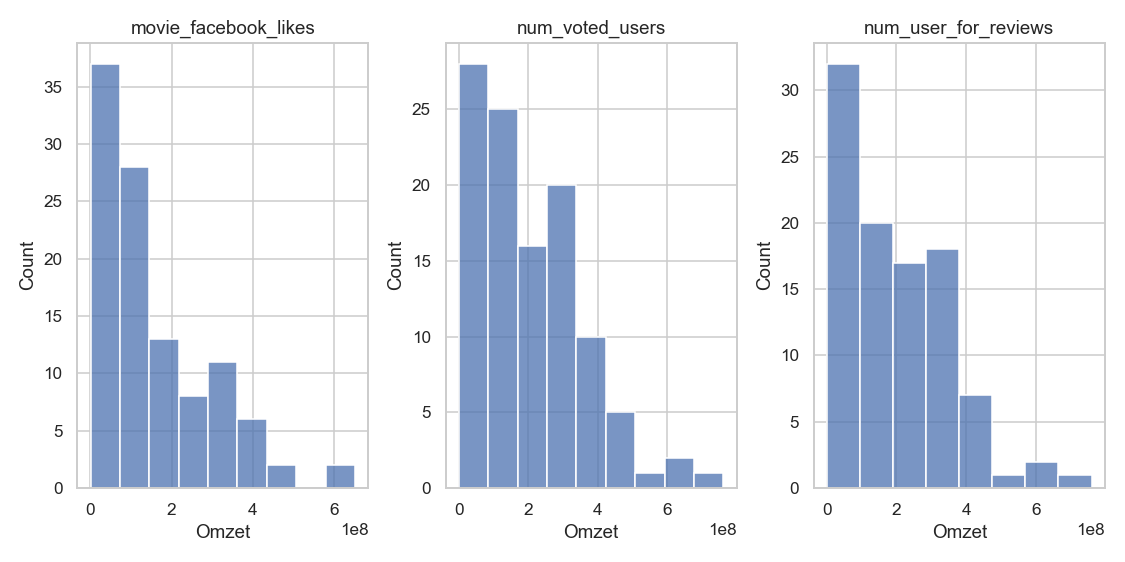

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

for i, variable in enumerate(cols):
    sns.histplot(data=outliers[i], x="gross", ax=ax[i])
    ax[i].set_xlabel("Omzet")
    ax[i].set_title(variable)
    
plt.tight_layout()

Het procentuele aantal van films met hoge opbrengsten is veel hoger in de uitschieter data.

In [46]:
votes_likes_review_overlap = pd.concat(outliers, axis=1, join="inner")

votes_likes_review_overlap.sample(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,oscar,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,oscar,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,oscar
243,Color,Alfonso Cuarón,738,91.0,0.0,13.0,Basher Savage,39.0,274084951.0,Adventure|Drama|Sci-Fi|Thriller,Phaldut Sharma,gravity,582917,87,Amy Warren,0.0,box office hit|long take|sole survivor|space|s...,http://www.imdb.com/title/tt1454468/?ref_=fn_t...,1885,English,UK,PG-13,100000000.0,2013.0,23.0,78,2.35,147000,True,Color,Alfonso Cuarón,738,91.0,0.0,13.0,Basher Savage,39.0,274084951.0,Adventure|Drama|Sci-Fi|Thriller,Phaldut Sharma,gravity,582917,87,Amy Warren,0.0,box office hit|long take|sole survivor|space|s...,http://www.imdb.com/title/tt1454468/?ref_=fn_t...,1885,English,UK,PG-13,100000000.0,2013.0,23.0,78,2.35,147000,True,Color,Alfonso Cuarón,738,91.0,0.0,13.0,Basher Savage,39.0,274084951.0,Adventure|Drama|Sci-Fi|Thriller,Phaldut Sharma,gravity,582917,87,Amy Warren,0.0,box office hit|long take|sole survivor|space|s...,http://www.imdb.com/title/tt1454468/?ref_=fn_t...,1885,English,UK,PG-13,100000000.0,2013.0,23.0,78,2.35,147000,True
17,Color,Joss Whedon,703,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,the avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722,English,USA,PG-13,220000000.0,2012.0,21000.0,81,1.85,123000,False,Color,Joss Whedon,703,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,the avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722,English,USA,PG-13,220000000.0,2012.0,21000.0,81,1.85,123000,False,Color,Joss Whedon,703,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,the avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722,English,USA,PG-13,220000000.0,2012.0,21000.0,81,1.85,123000,False
3,Color,Christopher Nolan,813,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,the dark knight rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,85,2.35,164000,False,Color,Christopher Nolan,813,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,the dark knight rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,85,2.35,164000,False,Color,Christopher Nolan,813,164.0,22000.0,23000.0,Christian Bale,27000.0,4

In [47]:
# TODO: venn diagram fixen
#venn3(subsets=(outliers_num_reviews, outliers_num_voted, outliers_fb_likes), set_labels=("reviews", "voted", "likes"))

Al deze films zijn enorme blockbusters geweest. Ze zijn zeer interessant om nader te bekijken, maar waarschijnlijk niet handig om allemaal mee te nemen bij het maken van een voorspellend model. (afhankelijk van procentuele opmaak werkelijkheid en dataset). Daarnaast staan The Avengers en Skyvall twee keer in de dataset. We kunnen alles het beste controleren op dubbele titels.

Het is zaak om te checken of het percentage populaire films in onze database overeenkomt het het percentage populaire films in de werkelijkheid. Op het moment dat dit niet het geval is, is het slim (een deel van) de uitschieterdata te verwijderen om hopelijk een dataset te creeeren die meer overeenkomt met de werkelijkheid.

### Title Year 

Dit variabel representeert het jaar waarin de desbtreffende film is uitgekomen.
Dit variabel is onafhankelijk omdat het niet beinvloed wordt door andere viarabelen in deze verzameling. Het meetniveau is discreet omdat er sprake is van een rangorde en gelijke stappen (jaartal).
We hebben dit variabel gekozen omdat het ons intressant lijkt om de veranderingen van variabelen te onderzoeken door de jaren heen.



#### Analyse

In [48]:
# Create refrence to column for easy access and readabillity
year = movie_df["title_year"]

# Describe variable and show amount of movies without year
print(year.describe())
print("\nMissing values: " + str(year.isnull().sum()))

count    4813.000000
mean     2002.445045
std        12.453460
min      1916.000000
25%      1999.000000
50%      2005.000000
75%      2011.000000
max      2016.000000
Name: title_year, dtype: float64

Missing values: 106


Hier kunnen we zien dat het datatype een float is. Dit is niet logisch aangezien jaartallen een volledig getal zijn. In data cleaning zullen we dit veranderen naar een integer type. Er zijn 105 films waarbij geen jaartal wordt vermeld.

Hieronder zullen we deze variabel met een paar visualisaties analyseren.

<IPython.core.display.Javascript object>


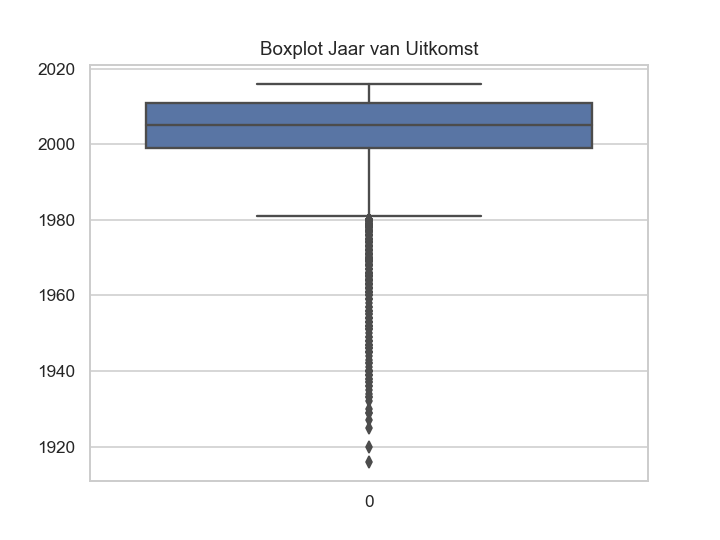

Text(0.5, 1.0, 'Boxplot Jaar van Uitkomst')

In [49]:
fig, ax = plt.subplots()

sns.boxplot(data=year)

ax.set_title("Boxplot Jaar van Uitkomst")

<IPython.core.display.Javascript object>


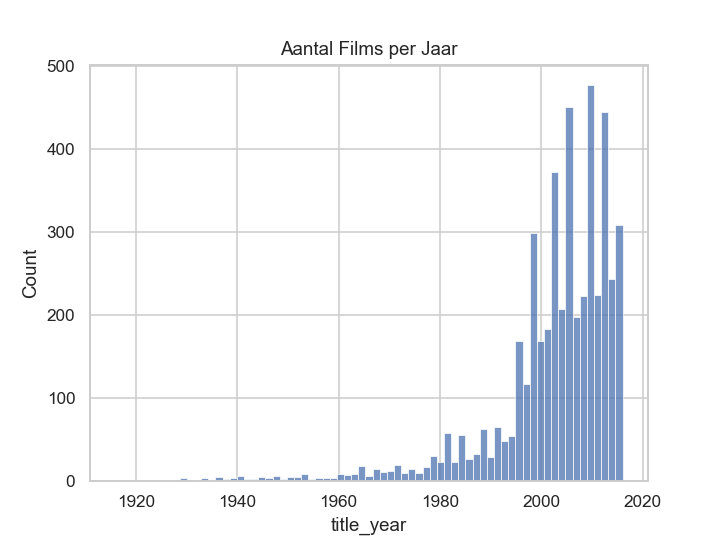

Text(0.5, 1.0, 'Aantal Films per Jaar')

In [50]:
fig, ax = plt.subplots()

sns.histplot(data=year)

ax.set_title("Aantal Films per Jaar")

In [51]:
movie_df[year.isna()].sample(100)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,oscar
3248,Color,NaN,1,30.0,NaN,140.0,Katherine Kelly Lang,177.0,NaN,Drama|Romance,Ronn Moss,the bold and the beautiful,5478,639,Hunter Tylo,0.0,beverly hills california|family relationships|...,http://www.imdb.com/title/tt0092325/?ref_=fn_t...,54,English,USA,TV-14,NaN,NaN,170.0,35,1.78,748,False
2733,Color,NaN,17,60.0,NaN,84.0,Steve Gonsalves,155.0,NaN,Documentary,Amy Bruni,ghost hunters,5563,552,Jason Hawes,0.0,ghost|paranormal|paranormal research|shaky cam,http://www.imdb.com/title/tt0426697/?ref_=fn_t...,57,English,USA,NaN,NaN,NaN,130.0,66,NaN,373,False
2687,Color,NaN,9,286.0,NaN,527.0,Tom Hollander,857.0,NaN,Drama|History|Thriller,Anna Silk,the company,3828,3809,Alessandro Nivola,3.0,cia|mole|revolution|spy|ussr,http://www.imdb.com/title/tt0488352/?ref_=fn_t...,39,English,USA,NaN,NaN,NaN,555.0,79,1.78,733,False
2904,Color,NaN,68,55.0,NaN,898.0,Kelvin Taylor,1000.0,NaN,Action|Adventure|Biography|Drama|History,Peter Mensah,spartacus: war of the damned,173172,6091,Viva Bianca,2.0,female frontal nudity|female full frontal nudi...,http://www.imdb.com/title/tt1442449/?ref_=fn_t...,302,English,USA,TV-MA,NaN,NaN,939.0,86,16.00,31000,False
3936,Color,NaN,1,45.0,NaN,119.0,Ash Cook,773.0,NaN,Drama|Thriller,James Nesbitt,the secret,653,1393,Genevieve O'Reilly,3.0,adultery|baptist church|dentist|double murder|...,http://www.imdb.com/title/tt5116280/?ref_=fn_t...,4,English,UK,NaN,NaN,NaN,133.0,73,NaN,405,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,Color,NaN,103,44.0,NaN,148.0,Scott Thompson,544.0,NaN,Crime|Drama|Horror|Mystery|Thriller,Caroline Dhavernas,hannibal,159910,996,Hettienne Park,1.0,blood|cannibalism|fbi|manipulation|psychiatrist,http://www.imdb.com/title/tt2243973/?ref_=fn_t...,270,English,USA,TV-14,NaN,NaN,183.0,86,1.78,59000,False
4686,Color,NaN,75,60.0,NaN,833.0,Masi Oka,1000.0,NaN,Drama|Fantasy|Sci-Fi|Thriller,Sendhil Ramamurthy,heroes,202115,4908,Greg Grunberg,4.0,father daughter relationship|serial killer|sup...,http://www.imdb.com/title/tt0813715/?ref_=fn_t...,379,English,USA,TV-14,NaN,NaN,923.0,77,16.00,0,False
257,Color,NaN,29,60.0,NaN,432.0,Dirk Benedict,669.0,NaN,Action|Adventure|Crime,George Peppard,the a-team,25402,1655,Dwight Schultz,4.0,1980s|cult tv|famous opening theme|good versus...,http://www.imdb.com/title/tt0084967/?ref_=fn_t...,97,English,USA,TV-PG,NaN,NaN,554.0,76,4.00,0,False
2383,Color,NaN,20,44.0,NaN,650.0,Melinda Clarke,828.0,NaN,Comedy|Drama|Romance,Peter Gallagher,the o.c.,65785,2546,Tate Donovan,8.0,california|lawyer|love|orange county californi...,http://www.imdb.com/title/tt0362359/?ref_=fn_t...,281,English,USA,TV-PG,NaN,NaN,787.0,75,1.78,0,False


### Gross 

Dit variabel representeert alle inkomen dat is binnengehaald voor de film, de gemiddelde omzet van een film is 48,46 miljoen. Dit variabele is een afhankelijk variabel omdat de omzet is de variabel waar wij de voorspelling van gaat meten, de meetniveau die hierbij horen zijn discreet. Wij hebben dit variabel gekozen omdat wij willen onderzoeken in hoeverre is de omzet van een film  te voorspellen.

In [52]:
gross = movie_df['gross']
gross.describe()


count    4.056000e+03
mean     4.762156e+07
std      6.736387e+07
min      1.620000e+02
25%      5.008728e+06
50%      2.503566e+07
75%      6.109941e+07
max      7.605058e+08
Name: gross, dtype: float64

Hierbij is te zien dat de omzet datatypen float, wij denken dat dit niet logisch is omdat de omzet bevat geen cijfers achter de comma en daarom gaan wij bij data cleaning dit veranderen naar een integer.  Hiernaast hebben wij ook opgemerkt dat in de top 20 hoogste omzet allemaal films uit landen als japan en Korea en India en bijna geen film uit de vs. Wij denken dat het data die wij hebben gekregen niet op dezelfde currency staan daarom gaan we bij het volgende stap de data omzetten naar een currency. Bij dit data zijn er 884 films waarbij de null values bevatten. 

In [53]:
gross = movie_df['gross']
gross.isna().sum()



863

In [54]:
cols = ["gross", "country"]

movie_df[cols].groupby("country").describe()

gross                                          \
                       count          mean           std         min   
country                                                                
Afghanistan              1.0  1.127331e+06           NaN   1127331.0   
Argentina                3.0  7.230936e+06  1.121271e+07    304124.0   
Aruba                    1.0  1.007614e+07           NaN  10076136.0   
Australia               40.0  3.779466e+07  5.883652e+07     13751.0   
Bahamas                  0.0           NaN           NaN         NaN   
...                      ...           ...           ...         ...   
Turkey                   0.0           NaN           NaN         NaN   
UK                     352.0  3.049946e+07  5.313668e+07      4756.0   
USA                   3154.0  5.453055e+07  7.091320e+07       703.0   
United Arab Emirates     0.0           NaN           NaN         NaN   
West Germany             1.0  1.143313e+07           NaN  11433134.0   

                                                                         
                              25%         50%          75%          max  
country                                                                  
Afghanistan            1127331.00   1127331.0   1127331.00    1127331.0  
Argentina               762692.50   1221261.0  10694342.50   20167424.0  
Aruba                 10076136.00  10076136.0  10076136.00   10076136.0  
Australia              1682481.00  15819234.0  35908631.75  257756197.0  
Bahamas                       NaN         NaN          NaN          NaN  
...                           ...         ...          ...          ...  
Turkey                        NaN         NaN          NaN          NaN  
UK                     2253591.75  13145155.5  35458761.50  362645141.0  
USA                    9592406.25  31837373.5  71346990.00  760505847.0  
United Arab Emirates          NaN         NaN          NaN          NaN  
West Germany          11433134.00  11433134.0  11433134.00   11433134.0  

[65 rows x 8 columns]

Een of meer waardes hebben "Official site" of "New Line" als hun land staan. Dit is geen land dus deze data klopt niet. Daarnaast is er een film geproduceerd in West Duitsland. Deze waarde is lastig om mee te werken als we alle geldwaardes om willen zetten naar de US dollar. We gaan deze daarom omzetten naar Duitsland.

In [55]:
movie_df[movie_df["country"] == "Official site"]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,oscar
2635,Color,Shana Feste,135,117.0,19.0,461.0,Cinda McCain,3000.0,20218921.0,Drama|Music,Leighton Meester,country strong,14814,4204,Tim McGraw,4.0,country music|panties|pink panties|relapse|son...,http://www.imdb.com/title/tt1555064/?ref_=fn_t...,114,English,Official site,PG-13,15000000.0,2010.0,646.0,63,2.35,0,False


In [56]:
movie_df[movie_df["country"] == "New Line"]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,oscar
278,Color,Peter Chelsom,62,104.0,23.0,591.0,Warren Beatty,752.0,6712451.0,Comedy|Romance,Del Zamora,town & country,4102,3133,Garry Shandling,0.0,anniversary|architect|cellist|friend|hardware ...,http://www.imdb.com/title/tt0141907/?ref_=fn_t...,89,English,New Line,R,90000000.0,2001.0,631.0,44,1.85,53,False


Country Strong is in de VS geproduceerd. Daarom gaan we nu het land veranderen naar USA. Town & Country is ook in de VS geproduceerd. Het werd gedistributeerd door New Line Cinema, een bedrijf in Hollywood.

In [57]:
movie_df.loc[(movie_df["country"] == "Official site") |  (movie_df["country"] == "New Line"), "country"] = "USA"

In [58]:
movie_df[(movie_df["country"] == "Official site") | (movie_df["country"] == "New Line")]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,oscar


In [59]:
movie_df.loc[movie_df["country"] == "West Germany", "country"] = "Germany"

In [60]:
movie_df[cols].groupby("country").describe()

gross                                          \
                       count          mean           std         min   
country                                                                
Afghanistan              1.0  1.127331e+06           NaN   1127331.0   
Argentina                3.0  7.230936e+06  1.121271e+07    304124.0   
Aruba                    1.0  1.007614e+07           NaN  10076136.0   
Australia               40.0  3.779466e+07  5.883652e+07     13751.0   
Bahamas                  0.0           NaN           NaN         NaN   
...                      ...           ...           ...         ...   
Thailand                 5.0  2.602325e+06  5.205761e+06       162.0   
Turkey                   0.0           NaN           NaN         NaN   
UK                     352.0  3.049946e+07  5.313668e+07      4756.0   
USA                   3156.0  5.450453e+07  7.089846e+07       703.0   
United Arab Emirates     0.0           NaN           NaN         NaN   

                                                                         
                              25%         50%          75%          max  
country                                                                  
Afghanistan            1127331.00   1127331.0   1127331.00    1127331.0  
Argentina               762692.50   1221261.0  10694342.50   20167424.0  
Aruba                 10076136.00  10076136.0  10076136.00   10076136.0  
Australia              1682481.00  15819234.0  35908631.75  257756197.0  
Bahamas                       NaN         NaN          NaN          NaN  
...                           ...         ...          ...          ...  
Thailand                102055.00    454255.0    549632.00   11905519.0  
Turkey                        NaN         NaN          NaN          NaN  
UK                     2253591.75  13145155.5  35458761.50  362645141.0  
USA                    9574429.25  31802559.5  71346950.00  760505847.0  
United Arab Emirates          NaN         NaN          NaN          NaN  

[62 rows x 8 columns]

De totale opbrengsten missen voor best veel waardes. 843 waardes om precies te zijn. Dit zijn er best veel. In het licht van de onderzoeksvragen kunnen we niet anders dan ze weggooien. Door hier andere waardes in te vullen zullen we de data bevuilen in een gebied waar dit totaal niet kan, namelijk het gebied dat we willen voorspellen.

In [61]:
movie_df = movie_df.dropna(subset=["gross"], how="any")

In [62]:
print(movie_df.shape)
movie_df.info()

(4056, 29)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4056 entries, 0 to 4918
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4054 non-null   object 
 1   director_name              4054 non-null   object 
 2   num_critic_for_reviews     4056 non-null   int32  
 3   duration                   4054 non-null   float64
 4   director_facebook_likes    4054 non-null   float64
 5   actor_3_facebook_likes     4043 non-null   float64
 6   actor_2_name               4050 non-null   object 
 7   actor_1_facebook_likes     4052 non-null   float64
 8   gross                      4056 non-null   float64
 9   genres                     4056 non-null   object 
 10  actor_1_name               4052 non-null   object 
 11  movie_title                4056 non-null   object 
 12  num_voted_users            4056 non-null   int64  
 13  cast_total_facebook_likes  4056 non-n

We weten nu van elke film uit welk land ze komen. Nu kunnen we de waardes onder omzet en budget omzetten naar dezelfde geldsom in Amerikaanse Dollars. Hiervoor gebruiken we de exchange rates van 2022, zoals gepubliceerd op https://data.oecd.org/conversion/exchange-rates.htm. 

In [63]:
exchanges = pd.read_csv("currency_exchange.csv")

exchanges.groupby("LOCATION").describe()

TIME                                                               \
         count    mean        std     min      25%     50%      75%     max   
LOCATION                                                                      
ABW        1.0  2021.0        NaN  2021.0  2021.00  2021.0  2021.00  2021.0   
AFG        1.0  2021.0        NaN  2021.0  2021.00  2021.0  2021.00  2021.0   
ALB       30.0  2006.5   8.803408  1992.0  1999.25  2006.5  2013.75  2021.0   
ARG       60.0  1991.5  17.464249  1962.0  1976.75  1991.5  2006.25  2021.0   
AUS       72.0  1985.5  20.928450  1950.0  1967.75  1985.5  2003.25  2021.0   
...        ...     ...        ...     ...      ...     ...      ...     ...   
TUR       72.0  1985.5  20.928450  1950.0  1967.75  1985.5  2003.25  2021.0   
TWN        1.0  2021.0        NaN  2021.0  2021.00  2021.0  2021.00  2021.0   
USA       72.0  1985.5  20.928450  1950.0  1967.75  1985.5  2003.25  2021.0   
ZAF       72.0  1985.5  20.928450  1950.0  1967.75  1985.5  2003.25  2021.0   
ZMB       72.0  1985.5  20.928450  1950.0  1967.75  1985.5  2003.25  2021.0   

         Value                                                            \
         count        mean        std        min         25%         50%   
LOCATION                                                                   
ABW        1.0    1.790000        NaN   1.790000    1.790000    1.790000   
AFG        1.0   77.500000        NaN  77.500000   77.500000   77.500000   
ALB       30.0  111.627263  19.781271  75.032500  100.126649  105.574584   
ARG       60.0    5.744503  16.436891   0.000000    0.000000    0.972098   
AUS       72.0    1.129305   0.282851   0.696666    0.892857    1.063001   
...        ...         ...        ...        ...         ...         ...   
TUR       72.0    1.095549   1.745704   0.000005    0.000016    0.020297   
TWN        1.0   27.915700        NaN  27.915700   27.915700   27.915700   
USA       72.0    1.000000   0.000000   1.000000    1.000000    1.000000   
ZAF       72.0    4.139643   4.447255   0.679477    0.714286    2.132354   
ZMB       72.0    2.539026   4.043449   0.000643    0.026170    0.714286   

                                 Flag Codes                               
                 75%         max      count mean std min 25% 50% 75% max  
LOCATION                                                                  
ABW         1.790000    1.790000        0.0  NaN NaN NaN NaN NaN NaN NaN  
AFG        77.500000   77.500000        0.0  NaN NaN NaN NaN NaN NaN NaN  
ALB       123.572688  150.633333        0.0  NaN NaN NaN NaN NaN NaN NaN  
ARG         3.071355   94.990742        0.0  NaN NaN NaN NaN NaN NaN NaN  
AUS         1.340113    1.933443        0.0  NaN NaN NaN NaN NaN NaN NaN  
...              ...         ...        ...  ...  ..  ..  ..  ..  ..  ..  
TUR         1.581209    8.850408        0.0  NaN NaN NaN NaN NaN NaN NaN  
TWN        27.915700   27.915700        0.0  NaN NaN NaN NaN NaN NaN NaN  
USA         1.000000    1.000000        0.0  NaN NaN NaN NaN NaN NaN NaN  
ZAF         6.966212   16.459105        0.0  NaN NaN NaN NaN NaN NaN NaN  
ZMB         3.809167   20.018487        0.0  NaN NaN NaN NaN NaN NaN NaN  

[72 rows x 24 columns]

Er staan meerdere jaren aan data in de koersen dataset. We gaan de munteenheid niet historisch corrigeren. Ook de inflatie door de jaren heen laten we buiten beschouwing. We gaan alle geld waardes omzetten naar de US dollar waarde met de gemiddelde koers over 2021. Deze eenheid is alleen voor DEW niet bekend. We gaan later controleren of we DEW gebruiken.

In [64]:
groups = exchanges.groupby(by="LOCATION")
exchanges = groups.apply(lambda g: g[g['TIME'] == g['TIME'].max()])

Het lijkt erop dat alle landen die de euro hebben geadopteerd apart in de dataset worden bijgehouden. Deze landen zouden in 2021 allemaal dezelfde koers moeten hebben. We gaan even controleren of dit het geval is.

In [65]:
exchanges.loc[exchanges["LOCATION"] == "EU27_2020"]["Value"]

LOCATION       
EU27_2020  3690    0.845494
Name: Value, dtype: float64

In [66]:
exchanges.sort_index(axis=1, inplace=True)

euro_value = float(exchanges.loc[exchanges["LOCATION"] == "EU27_2020"]["Value"])
exchanges.loc[exchanges.loc[:, "Value"]==euro_value, :]

,,FREQUENCY,Flag Codes,INDICATOR,LOCATION,MEASURE,SUBJECT,TIME,Value
LOCATION,,,,,,,,,
AUT,143,A,NaN,EXCH,AUT,NATUSD,TOT,2021,0.845494
BEL,215,A,NaN,EXCH,BEL,NATUSD,TOT,2021,0.845494
CYP,3185,A,NaN,EXCH,CYP,NATUSD,TOT,2021,0.845494
DEU,607,A,NaN,EXCH,DEU,NATUSD,TOT,2021,0.845494
EA19,2892,A,NaN,EXCH,EA19,NATUSD,TOT,2021,0.845494
ESP,1698,A,NaN,EXCH,ESP,NATUSD,TOT,2021,0.845494
EST,2368,A,NaN,EXCH,EST,NATUSD,TOT,2021,0.845494
EU27_2020,3690,A,NaN,EXCH,EU27_2020,NATUSD,TOT,2021,0.845494
FIN,463,A,NaN,EXCH,FIN,NATUSD,TOT,2021,0.845494


De koers van de euro staat geregistreerd onder elk land dat de euro geadopteerd heeft. Hier hoeven we dus niet meer naar om te kijken.

De munteenheid wordt in de meeste gevallen weergegeven met een drie letterige code. We gaan een dataset met ISO 3166 codes met bijbehordende landsnamen inladen. Als we deze land codes toevoegen aan de film data, kunnen we makkelijk de juiste koers linken aan de film uit het juiste land.

In [67]:
country_codes = pd.read_csv("ISO_3166-1_alpha-3.csv", delimiter=":")
country_codes

movie_df = pd.merge(movie_df, country_codes, on="country", how="left")
movie_df.sample(15)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,oscar,ISO-code
2797,Color,Philip Saville,25,125.0,10.0,109.0,Alan Van Sprang,866.0,4068087.0,Biography|Drama|History,Henry Ian Cusick,the visual bible: the gospel of john,2164,1281,Scott Handy,1.0,1st century|based on the bible|miracle|religio...,http://www.imdb.com/title/tt0377992/?ref_=fn_t...,74,English,Canada,PG-13,17000000.0,2003.0,147.0,77,1.85,0,False,CAN
2197,Color,Steve Beck,149,91.0,17.0,670.0,Embeth Davidtz,1000.0,41867960.0,Horror,Shannon Elizabeth,thir13en ghosts,65512,3023,F. Murray Abraham,0.0,collector|ghost|ghost hunter|glass house|machine,http://www.imdb.com/title/tt0245674/?ref_=fn_t...,478,English,USA,R,20000000.0,2001.0,795.0,55,1.33,0,False,USA
2279,Color,Hal Needham,40,99.0,379.0,251.0,Michael Beck,456.0,5333658.0,Action|Sci-Fi,Barry Bostwick,megaforce,2541,1356,Henry Silva,2.0,dictator|electronic music score|one word title...,http://www.imdb.com/title/tt0084316/?ref_=fn_t...,54,English,USA,PG,20000000.0,1982.0,278.0,35,1.85,0,False,USA
3177,Color,Damian Nieman,25,101.0,0.0,83.0,Jason Cerbone,240.0,10696.0,Crime|Thriller,Glenn Plummer,shade,10771,490,Mark De Alessandro,8.0,bar|strip club|stripper|texas hold 'em|thong,http://www.imdb.com/title/tt0323939/?ref_=fn_t...,65,English,USA,R,6800000.0,2003.0,83.0,64,2.35,413,False,USA
3460,Color,Mars Callahan,41,99.0,60.0,444.0,Ricky Schroder,979.0,562059.0,Drama|Thriller,Chazz Palminteri,poolhall junkies,8535,3130,Ernie Reyes Jr.,4.0,beating|hustler|jail|money|revenge,http://www.imdb.com/title/tt0273982/?ref_=fn_t...,113,English,USA,R,4000000.0,2002.0,665.0,70,1.85,872,False,USA
3173,Color,Clint Eastwood,38,115.0,16000.0,240.0,Chris Penn,16000.0,41400000.0,Western,Clint Eastwood,pale rider,39451,17209,Sydney Penny,0.0,gold|miner|preacher|prospector|sheriff,http://www.imdb.com/title/tt0089767/?ref_=fn_t...,138,English,USA,R,6900000.0,1985.0,455.0,73,2.35,0,False,USA
3313,Color,Mike Flanagan,336,104.0,59.0,202.0,Rory Cochrane,972.0,27689474.0,Horror|Mystery,James Lafferty,oculus,85688,2071,Garrett Ryan,0.0,home office|mirror|released from a mental hosp...,http://www.imdb.com/title/tt2388715/?ref_=fn_t...,339,English,USA,R,5000000.0,2013.0,407.0,65,2.35,23000,False,USA
3419,Color,Niki Caro,149,101.0,51.0,8.0,Rawiri Paratene,446.0,20772796.0,Drama|Family,Keisha Castle-Hughes,whale rider,34232,497,Tammy Davis,1.0,girl|maori|new zealand|tradition|whale,http://www.imdb.com/title/tt0298228/?ref_=fn_t...,346,English,New Zealand,PG-13,6000000.0,2002.0,20.0,76,2.35,0,False,NZL
407,Color,Jon Amiel,149,135.0,36.0,106.0,Tchéky Karyo,894.0,31111260.0,Action|Adventure|Sci-Fi|Thriller,Glenn Morshower,the core,77029,1439,Rekha Sharma,0.0,core|earth|natural disaster|pacemaker|scientist,http://www.imdb.com/title/tt0298814/?ref_=fn_t...,466,English,USA,PG-13,60000000.0,2003.0,345.0,54,2.35,0,False,USA
2859,Black and White,Leon Ichaso,14,123.0,5.0,338.0,Clarence Williams III,556.0,18272447.0,Drama|Thriller,Khandi Alexander,sugar hill,3119,2149,Steve Harris,1.0,african american|harlem manhattan new york cit...,http://www.imdb.com/title/tt0107079/?ref_=fn_t...,35,English,USA,R,10000000.0,1993.0,475.0,59,1.85,331,False,USA


In [68]:
movie_df["ISO-code"].isna().sum()

0

Alle landen hebben een ISO 3166 code. We gaan nu proberen de munt koersen te linken.

In [69]:
exchanges.drop(labels=["INDICATOR", "SUBJECT", "MEASURE", "FREQUENCY", "TIME", "Flag Codes"], axis=1, inplace=True)

In [70]:
exchanges.rename({"LOCATION" : "ISO-code", "Value": "currency_exchange_rate_2021"}, axis=1, inplace=True)

movie_df = pd.merge(movie_df, exchanges, on="ISO-code", how="left")

movie_df.sample(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,oscar,ISO-code,currency_exchange_rate_2021
2917,Color,Franklin J. Schaffner,2,118.0,76.0,249.0,William Hootkins,902.0,800000.0,Adventure|Mystery|Thriller,Frank Langella,sphinx,892,2079,John Gielgud,0.0,bat|curse|egyptologist|mummy|murder,http://www.imdb.com/title/tt0083113/?ref_=fn_t...,21,English,USA,PG,14000000.0,1981.0,488.0,52,2.35,106,False,USA,1.0
2479,Color,Catherine Owens,68,85.0,0.0,44.0,The Edge,468.0,10353690.0,Documentary|Music,Bono,u2 3d,2673,646,Larry Mullen Jr.,0.0,3d in title|digit in title|rock band|rocker|u2,http://www.imdb.com/title/tt0892375/?ref_=fn_t...,31,English,USA,G,NaN,2007.0,67.0,84,1.78,116,False,USA,1.0
567,Color,Cameron Crowe,153,141.0,488.0,509.0,Ivana Milicevic,10000.0,100614858.0,Fantasy|Mystery|Romance|Sci-Fi|Thriller,Tom Cruise,vanilla sky,206776,11458,Noah Taylor,1.0,death|dream|love|lynchian|reality,http://www.imdb.com/title/tt0259711/?ref_=fn_t...,1248,English,USA,R,68000000.0,2001.0,834.0,69,1.85,0,False,USA,1.0
2484,Color,Brian Koppelman,57,92.0,34.0,366.0,Tom Noonan,14000.0,11632420.0,Crime|Drama|Thriller,Vin Diesel,knockaround guys,19768,15644,Kevin Gage,1.0,mob|mobster|money|montana|sheriff,http://www.imdb.com/title/tt0211465/?ref_=fn_t...,135,English,USA,R,NaN,2001.0,442.0,61,2.35,566,False,USA,1.0
3430,Color,Henry Hobson,256,95.0,9.0,428.0,J.D. Evermore,584.0,131175.0,Drama|Horror,Joely Richardson,maggie,30219,1885,David A Cole,2.0,father daughter relationship|playing against t...,http://www.imdb.com/title/tt1881002/?ref_=fn_t...,200,English,USA,PG-13,8500000.0,2015.0,430.0,56,2.35,22000,False,USA,1.0


In [71]:
movie_df.groupby("country")["currency_exchange_rate_2021"].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Afghanistan,1.0,77.500000,NaN,77.500000,77.500000,77.500000,77.500000,77.500000
Argentina,3.0,94.990742,0.000000e+00,94.990742,94.990742,94.990742,94.990742,94.990742
Aruba,1.0,1.790000,NaN,1.790000,1.790000,1.790000,1.790000,1.790000
Australia,40.0,1.331224,6.746199e-16,1.331224,1.331224,1.331224,1.331224,1.331224
Belgium,2.0,0.845494,0.000000e+00,0.845494,0.845494,0.845494,0.845494,0.845494
Brazil,5.0,5.394401,0.000000e+00,5.394401,5.394401,5.394401,5.394401,5.394401
Cameroon,1.0,554.530675,NaN,554.530675,554.530675,554.530675,554.530675,554.530675
Canada,72.0,1.253877,1.788823e-15,1.253877,1.253877,1.253877,1.253877,1.253877
Chile,1.0,758.955379,NaN,758.955379,758.955379,758.955379,758.955379,758.955379


Bij elk land staat nu de gemiddelde koers genoteerd. Er zijn geen afwijkende waardes, want het minumum en het maximum van elk land is hetzelfde. Dit betekent dat er dezelfde koers voor iedere film in hetzelfde land is genoteerd. 

We gaan nu de waarde van de omzet en het budget van iedere film omzetten naar de equivalente waarde in US dollars. 

In [72]:
movie_df["budget_usd"] = movie_df["budget"] / movie_df["currency_exchange_rate_2021"]
movie_df["gross_usd"] = movie_df["gross"] / movie_df["currency_exchange_rate_2021"]

movie_df[["gross", "budget", "budget_usd", "gross_usd"]].describe()

,gross,budget,budget_usd,gross_usd
count,4.056000e+03,3.790000e+03,3.790000e+03,4.056000e+03
mean,4.762156e+07,4.472383e+07,3.779866e+07,4.819741e+07
std,6.736387e+07,2.250798e+08,4.561014e+07,6.846685e+07
min,1.620000e+02,2.180000e+02,2.372080e-01,5.063782e+00
25%,5.008728e+06,9.525000e+06,8.718198e+06,4.666889e+06
50%,2.503566e+07,2.400000e+07,2.300000e+07,2.515823e+07
75%,6.109941e+07,5.000000e+07,5.000000e+07,6.344261e+07
max,7.605058e+08,1.221550e+10,8.279184e+08,7.605058e+08


Nu de waardes zijn gecorrigeerd, is de maximum waarde van het budget een stuk lager komen te liggen. De minimum waardes zijn te laag. Je kan geen film maken met een paar dollar. Het lijkt erop dat het omzetten van de opbrengsten en het budget naar de US dollar volgens de koers over 2021 goede en slechte resultaten met zich meebrengt.

In [73]:
movie_df.sort_values("budget_usd").head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,oscar,ISO-code,currency_exchange_rate_2021,budget_usd,gross_usd
4048,Color,Jafar Panahi,64,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,Fereshteh Sadre Orafaiy,the circle,4555,5,Mojgan Faramarzi,0.0,abortion|bus|hospital|prison|prostitution,http://www.imdb.com/title/tt0255094/?ref_=fn_t...,26,Persian,Iran,Not Rated,10000.0,2000.0,0.0,75,1.85,697,False,IRN,42157.093500,0.237208,15.982601
4005,Color,Majid Majidi,46,89.0,373.0,27.0,Amir Farrokh Hashemian,36.0,925402.0,Drama|Family,Bahare Seddiqi,children of heaven,27882,100,Mohammad Amir Naji,0.0,class|gardening|race|school|shoe,http://www.imdb.com/title/tt0118849/?ref_=fn_t...,130,Persian,Iran,PG,180000.0,1997.0,35.0,85,1.85,0,False,IRN,42157.093500,4.269744,21.951276
3864,Color,Asghar Farhadi,354,123.0,0.0,620.0,Leila Hatami,786.0,7098492.0,Drama|Mystery,Shahab Hosseini,a separation,151812,2501,Peyman Moaadi,2.0,alzheimer's disease|caregiver|divorce|iran|ira...,http://www.imdb.com/title/tt1832382/?ref_=fn_t...,264,Persian,Iran,PG-13,500000.0,2011.0,712.0,84,1.85,48000,True,IRN,42157.093500,11.860400,168.381912
3787,Color,Gareth Evans,481,102.0,338.0,60.0,Yayan Ruhian,1000.0,4105123.0,Action|Crime|Thriller,Iko Uwais,the raid: redemption,148221,1445,Donny Alamsyah,0.0,apartment|drug lord|gangster|police|swat team,http://www.imdb.com/title/tt1899353/?ref_=fn_t...,316,Indonesian,Indonesia,R,1100000.0,2011.0,342.0,76,1.85,51000,False,IDN,14308.143901,76.879294,286.908143
4051,Color,Neill Dela Llana,35,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,Ian Gamazon,cavite,589,0,Quynn Ton,0.0,jihad|mindanao|philippines|security guard|squa...,http://www.imdb.com/title/tt0428303/?ref_=fn_t...,35,English,Philippines,Not Rated,7000.0,2005.0,0.0,63,NaN,74,False,PHL,49.261080,142.100011,1422.441408


In [74]:
movie_df.sort_values("budget_usd", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,oscar,ISO-code,currency_exchange_rate_2021,budget_usd,gross_usd
3400,Color,Carlos Saura,35,115.0,98.0,4.0,Juan Luis Galiardo,341.0,1687311.0,Drama|Musical,Mía Maestro,tango,2412,371,Miguel Ángel Solá,3.0,dancer|director|love|musical filmmaking|tango,http://www.imdb.com/title/tt0120274/?ref_=fn_t...,40,Spanish,Spain,PG-13,700000000.0,1998.0,26.0,72,2.00,539,True,ESP,0.845494,8.279184e+08,1.995651e+06
972,Color,Luc Besson,111,158.0,0.0,15.0,David Bailie,51.0,14131298.0,Adventure|Biography|Drama|History|War,Paul Brooke,the messenger: the story of joan of arc,55889,144,Rab Affleck,0.0,cathedral|dauphin|france|trial|wartime rape,http://www.imdb.com/title/tt0151137/?ref_=fn_t...,390,English,France,R,390000000.0,1999.0,40.0,64,2.35,0,False,FRA,0.845494,4.612688e+08,1.671366e+07
8,Color,David Yates,375,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,harry potter and the half-blood prince,321795,58753,Rupert Grint,3.0,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973,English,UK,PG,250000000.0,2009.0,11000.0,75,2.35,10000,False,GBR,0.727065,3.438482e+08,4.153095e+08
2,Color,Sam Mendes,602,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994,English,UK,PG-13,245000000.0,2015.0,393.0,68,2.35,85000,True,GBR,0.727065,3.369712e+08,2.751806e+08
1,Color,Gore Verbinski,302,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,pirates of the caribbean: at world's end,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,71,2.35,0,False,USA,1.000000,3.000000e+08,3.094042e+08


De recente films hebben nu een goede weergave van waarde. De waarde van oude films was misschien al vertekend en is dat nu in ieder geval. Vooral buitenlandse films waarvan de waarde van de munt van het land flink is gedaald na de uitkomst van de film hebben een erg vertekende waarde nu. Een Iranese film heeft volgens de berekening een budget van 0.20 dollar. Dit kan natuurlijk niet kloppen. We zouden kunnen proberen de data historisch kunnen corrigieren, maar dit is waarschijnlijk meer moeite dan dat het waard is.

### Budget

Dit variabel representeert alle kosten die de film heeft uitgegeven om het te maken, het gemiddelde budget van een film is 3,975 miljoen hierbij moet je ook rekening houden met dat niet alle currency hetzelfde zijn hierdoor kan de gemiddelde omhoog halen. Dit variabel is een onafhankelijk variabel omdat wij denken dat budget een oorzaak variabel is voor de omzet. De bijbehorende meetniveau is discreet. 


In [75]:
budget = movie_df['budget']
budget.describe()

count    3.790000e+03
mean     4.472383e+07
std      2.250798e+08
min      2.180000e+02
25%      9.525000e+06
50%      2.400000e+07
75%      5.000000e+07
max      1.221550e+10
Name: budget, dtype: float64

In [76]:
budget = movie_df['budget']
budget.isna().sum()

266

Hierbij is te zien dat het budget datatypen float bevat wij denken dat dit niet logisch is omdat de omzet bevat geen cijfers achter de comma en daarom gaan wij bij data cleaning dit veranderen naar een integer. Hiernaast zijn Bij dit data 884 films waarbij de null values bevatten. Daarnaast bij het budget is de data niet op een currency waardoor dit moet worden omgezet naar een currency.


### Genre

Omdat het lastig om het variabel 'genre' te analyseren zullen we een kolom toevoegen voor elke unieke genre. Bijvoorbeeld waarde 'Fantasy|Horror' moet veranderen naar een kolom 'Fantasy' en een kolom 'Horror' met elk een 'true'. Elke genre kolom bevat een boolean als indicatie of de film wel of niet onder het desbetreffende genre valt.

#### Cleaning

In [77]:
movie_df.sample(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,oscar,ISO-code,currency_exchange_rate_2021,budget_usd,gross_usd
328,Color,Sergey Bodrov,175,102.0,44.0,766.0,Djimon Hounsou,12000.0,17176900.0,Action|Adventure|Fantasy,Jeff Bridges,seventh son,54501,17098,Olivia Williams,4.0,apprentice|demon|exorcism|master apprentice re...,http://www.imdb.com/title/tt1121096/?ref_=fn_t...,154,English,USA,PG-13,95000000.0,2014.0,3000.0,55,2.35,16000,False,USA,1.000000,9.500000e+07,1.717690e+07
2407,Color,Tom Hooper,479,118.0,0.0,520.0,Jennifer Ehle,14000.0,138795342.0,Biography|Drama|History|Romance,Colin Firth,the king's speech,503631,15732,Derek Jacobi,0.0,king|king george vi|speech|speech therapist|th...,http://www.imdb.com/title/tt1504320/?ref_=fn_t...,636,English,UK,R,15000000.0,2010.0,1000.0,80,1.85,64000,True,GBR,0.727065,2.063089e+07,1.908981e+08
67,Color,Rob Letterman,219,94.0,11.0,459.0,Rainn Wilson,1000.0,198332128.0,Action|Adventure|Animation|Comedy|Family|Sci-Fi,Amy Poehler,monsters vs. aliens,114553,2579,Stephen Colbert,2.0,alien|alien invasion|alien space craft|giant|g...,http://www.imdb.com/title/tt0892782/?ref_=fn_t...,187,English,USA,PG,175000000.0,2009.0,973.0,65,2.35,0,False,USA,1.000000,1.750000e+08,1.983321e+08
2295,Color,Cory Edwards,142,80.0,19.0,854.0,Chazz Palminteri,11000.0,51053787.0,Action|Animation|Comedy|Crime|Family,Anne Hathaway,hoodwinked!,45900,14385,Jim Belushi,1.0,animal|axe|red riding hood|wolf|woodsman,http://www.imdb.com/title/tt0443536/?ref_=fn_t...,247,English,USA,PG,17500000.0,2005.0,979.0,65,1.85,0,False,USA,1.000000,1.750000e+07,5.105379e+07
1236,Color,Elaine May,49,107.0,124.0,572.0,Warren Beatty,636.0,14375181.0,Action|Adventure|Comedy|Music|Thriller,Carol Kane,ishtar,8692,3374,Isabelle Adjani,2.0,cia|emir|hotel|map|morocco,http://www.imdb.com/title/tt0093278/?ref_=fn_t...,126,English,USA,PG-13,51000000.0,1987.0,631.0,42,1.85,754,False,USA,1.000000,5.100000e+07,1.437518e+07
2396,Color,William Bindley,21,94.0,4.0,518.0,Jake Lloyd,844.0,508867.0,Drama|Sport,Bruce Dern,madison,1033,3583,William Shockley,0.0,boat racing|hydroplane|loyalty|one word title|...,http://www.imdb.com/title/tt0206113/?ref_=fn_t...,26,English,USA,PG,NaN,2001.0,626.0,65,2.35,282,False,USA,1.000000,NaN,5.088670e+05
18,Color,Barry Sonnenfeld,451,106.0,188.0,718.0,Michael Stuhlbarg,10000.0,179020854.0,Action|Adventure|Comedy|Family|Fantasy|Sci-Fi,Will Smith,men in black 3,268154,12572,Nicole Scherzinger,1.0,alien|criminal|m.i.b.|maximum security prison|...,http://www.imdb.com/title/tt1409024/?ref_=fn_t...,341,English,USA,PG-13,225000000.0,2012.0,816.0,68,1.85,40000,False,USA,1.000000,2.250000e+08,1.790209e+08
2047,Color,Jun Falkenstein,89,77.0,25.0,16.0,John Fiedler,304.0,45542421.0,Animation|Comedy|Drama|Family|Musical,Kath Soucie,the tigger movie,13319,575,Ken Sansom,0.0,cartoon tiger|coming of age|tiger|tigger|title...,http://www.imdb.com/title/tt0220099/?ref_=fn_t...,53,English,USA,G,30000000.0,2000.0,253.0,63,1.78,347,False,USA,1.000000,3.000000e+07,4.554242e+07
2048,Color,Jaume Collet-Serra,265,123.0,174.0,602.0,CCH Pounder,87000.0,41573740.0,Horror|Mystery|Thriller,Jimmy Bennett,orphan,141663,88953,Aryana Engineer,1.0,alcoholism|girl|little girl|orphan|troubled ma...,http://www.imdb.com/title/tt1148204/?ref_=fn_t...,383,English,USA,R,NaN,2009.0,1000.0,70,1.85,20000,False,USA,1.000000,NaN,4.157374e+07
3282,Color,Émile Gaudreault,67,92.0,9.0,71.0,Luke Kirby,636.0,6239558.0,Comedy|Drama,Paul Sorvino,mambo italiano,5548,1033,Claudia Ferri,0.0,gay|immigrant|italian|police|police officer,http://www.imdb.com/title/tt0330602/?ref_=fn_t...,67,English,Canada,R,5000000.0,20

Je kan in de sample data zien dat ieder unieke genre is toegevoegd als een kolom. De films hebben een True waarde bij de genres die ze hebben en staan overal anders op False.

In [78]:
genre_count = dict()
for index, genres in zip (movie_df.index, movie_df["genres"]):
    temp_genre = genres.split(sep='|')
    for genre in temp_genre:
        if genre not in genre_count:
            genre_count[genre] = 1
            movie_df[genre] = False
        else:
            genre_count[genre] += 1
        movie_df.at[index, genre] = True

genre_count

['Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'Thriller',
 'Romance',
 'Animation',
 'Comedy',
 'Family',
 'Musical',
 'Mystery',
 'Western',
 'Drama',
 'History',
 'Sport',
 'Crime',
 'Horror',
 'War',
 'Biography',
 'Music',
 'Documentary',
 'News',
 'Short',
 'Film-Noir']

#### Visualisatie

In [79]:
colors = sns.color_palette('pastel')[0:10]

def sort_dict_value(unsorted_dict):
    """Sorts a dictionary by value."""
    # source: https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
    return dict(sorted(unsorted_dict.items(), key=lambda item: item[1], reverse=True))

genre_count = sort_dict_value(genre_count)

fig, ax = plt.subplots(figsize=(20, 5))
# 5043 is the total amount of movies in the dataframe.
sns.barplot(x=list(genre_count.keys()), y=[(amount / 5043) * 100 for amount in genre_count.values()])

plt.xlabel("Genre")
plt.ylabel("Percentage of movies")
plt.tight_layout()

NameError: name 'genre_count' is not defined

In [ ]:
movie_df["num_voted_users"]

In [ ]:
cols_to_drop = ["color", "facenumber_in_poster", "actor_1_name", "actor_2_name", "actor_3_name", "movie_imdb_link", "aspect_ratio", "language", "plot_keywords"]

movie_df.drop(cols_to_drop, axis=1, inplace=True)

movie_df.info()

In [ ]:
plt.scatter(movie_df["gross"], movie_df["budget"])

# Voorspellen van de Omzet

We willen de omzet voorspellen aan de hand van beoordelingen op (online) platformen. 

Om deze vraag te beantwoorden hebben we een lineaire regressie model gekozen. Met dit model kunnen we een continue target voorspellen met een of meerdere continue features. Al onze tot nu toe gekozen features zijn kwantitatief net als onze target, daarom lijkt het model een goede keuze. 

Voordat we een model gaan maken, gaan we onze basecase bedenken. Als basecase nemen we de mediaan van de omzet voor iedere gok. Ons voorspellende model moest significant beter werken dan dat.

In [ ]:
np.median(movie_df.loc[:, "gross_usd"])

In [ ]:
y_base = movie_df.loc[:, "gross_usd"][:800]
median_base = np.full(800, np.median(movie_df.loc[:, "gross_usd"][:800]))

print(np.sqrt(metrics.mean_squared_error(y_base, median_base)))

metrics.r2_score(y_base, median_base)

In [ ]:
y_base

In [ ]:
# methode 1 r2. Werkt niet wanneer een waarde constant is.
# np.corrcoef(median_800, y_base)

In [ ]:
# 1 - (np.var(y_base)) / (np.var(y_base - median_base))

Een r2 score van 0 betekent dat een model het net zo goed doet als het gemiddelde gokken. De mediaan heeft een negatieve score, wat betekent dat het een slechtere indicator is dan het gemiddelde. We kunnen dus beter het gemiddelde als basecase nemen. Dit is ook makkelijk te meten met de r2_score. 

Nu we dit uit de weg hebbe gaan we een aantal modellen maken met verschillende feature variabelen om zo tot het beste model te komen.

Het eerste model bestaat uit een aantal features die alleen diets zeggen over de kwantiteit van het "verkeer" rondom de film. Deze features hadden hele hoge correlaties met de omzet. Onze verwachting is dat dit model een stuk beter dan de basecase zal werken, maar nog accurater kan worden met verdere training.

In [ ]:
cross_platform_cols = ["num_critic_for_reviews", "num_voted_users", "num_user_for_reviews"]

y = movie_df["gross_usd"]
X = movie_df.loc[:, cross_platform_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12345)

In [ ]:
reg = LinearRegression()

Nu gaan we het model trainen met de train data.

In [ ]:
reg.fit(X_train, y_train)

In [ ]:
# print the intercept and coefficients
print(reg.intercept_)
print(reg.coef_)
# pair the feature names with the coefficients
list(zip(cross_platform_cols, reg.coef_))

Om het model te testen gaan we nu de test dataset voorspellen. Vervolgens kijken we hoe goed de voorspellingen waren door te kijken hoever ze van de werkelijke waardes aflagen. Dit doen we met de RMSE.

In [ ]:
y_cross_pred = reg.predict(X_test)

cross_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_cross_pred))
cross_rmse

In [ ]:
cross_r2 = metrics.r2_score(y_test, y_cross_pred)
cross_r2

Het model werkt aanzienlijk beter dan het gemiddelde voorspellen, maar met een gemiddelde afwijking van 52,5 miljoen is het nog niet geweldig. We gaan kijken of we het model beter kunnen maken door hem verder of met andere waardes te trainen.

Het volgende model gebruikt de platform specifieke meetwaardes om voorspellingen te maken. Onze verwachting is dat dit model gemiddeld slechtere voorspellingen maakt dan het vorige model, aangezien deze data gevoeliger is om door bijvoorbeeld de demografie van de gebruikers van het platform vertekend te zijn. Het is natuurlijk interessant om te onderzoeken of dit vermoeden klopt.

In [ ]:
platform_specific_cols = ["imdb_score", "movie_facebook_likes"]
X = movie_df.loc[:, platform_specific_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12345)

reg = LinearRegression()

reg.fit(X_train, y_train)

In [ ]:
# print the intercept and coefficients
print(reg.intercept_)
print(reg.coef_)
# pair the feature names with the coefficients
list(zip(platform_specific_cols, reg.coef_))

In [ ]:
y_spfc_pred = reg.predict(X_test)

spfc_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_spfc_pred))

In [ ]:
metrics.r2_score(y_test, y_spfc_pred)

Onze verwachtingen komen overeen met de resultaten van dit model. Het model dat zijn voorspellingen baseert op meetwaardes die alleen op specifieke platformen worden gemeten zijn minder indicatief voor de uiteindelijke opbrengst dan meetwaardes die over meerdere platformen worden verzameld. Het zou interessant kunnen zijn dit verder te onderzoeken, maar de data die nu tot onze beschikking is, is niet voldoende om hier echt een uitspraak over te doen.

We gaan nu het model combineren (Agus)

In [ ]:
movie_sub = movie_df[['gross','imdb_score','num_voted_users','num_critic_for_reviews','movie_facebook_likes', ]].copy()
movie_sub.head()

In [ ]:
# type modeltype en er is geeen hyperparameter in linear regression 
reg = LinearRegression()

In [ ]:
X = movie_df[['imdb_score','num_voted_users','num_critic_for_reviews','movie_facebook_likes', ]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12345)

In [ ]:
reg.fit(X_train, y_train)

In [ ]:
y_pred_temp_name = reg.predict(X_test)

temp_name_r2 = metrics.r2_score(y_test, y_pred_temp_name)

temp_name_r2

Tot slot gaan we een laatste model maken met alle parameters die te maken hebben met verkeer rondom een film. Hier vallen ook parameters onder die wij bij uitstek niet zo interessant vonden. Deze moeten we nu eerst schoonmaken. 

In [ ]:
bias_worse_facebook_cols = ["actor_1_facebook_likes", "actor_2_facebook_likes", "actor_3_facebook_likes", "director_facebook_likes", "cast_total_facebook_likes"]
all_traffic_cols = bias_worse_facebook_cols + cross_platform_cols + platform_specific_cols
# miss ook wel leuk om met director te kijken of director ipv director likes te gebruiken. 

for parameter in bias_worse_facebook_cols:
    movie_df[parameter] = movie_df[parameter].fillna(0)

movie_df[all_traffic_cols].isna().sum()

In [ ]:
X = movie_df[all_traffic_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12345)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_all_pred = reg.predict(X_test)

all_rsme = np.sqrt(metrics.mean_squared_error(y_test, y_all_pred))
all_rsme

In [ ]:
all_r2 = metrics.r2_score(y_test, y_all_pred)
all_r2

Dit is de beste R2 waarde die we tot nu toe hebben bereikt. Het gemiddelde aantal dat we van de voorspelling afzitten is 50 miljoen. Dit scoort 49,5% beter dan de gemiddelde opbrengsten voorspellen. 

Wat zou er gebeuren als we de director zelf gebruiken in plaats van het aantal likes dat hij heeft ontvangen op facebook? Om dit te onderzoeken moeten we eerst director name opschonen.

In [ ]:
movie_df.isna().sum()

In [ ]:
movie_df.loc[:, "director_name"].isna().sum()

In [ ]:
movie_df.loc[:, "director_name"] = movie_df.loc[:, "director_name"].fillna("N/A")
movie_df.loc[:, "director_name"].isna().sum()

Nu gaan we een apart dataframe maken, waarin we voor iedere director een kolom aanmaken zodat we deze waarde kunnen gebruiken met het lineaire regressie model.

In [ ]:
category_types = []

all_traffic_cols.append("director_name")

director_split_df = movie_df[all_traffic_cols] 
director_split_df = pd.get_dummies(director_split_df, columns=['director_name'])
director_split_df.columns

Nu kunnen we het model trainen met onderscheid tussen alle directors. 

In [ ]:
reg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(director_split_df, y, random_state=12345)

reg.fit(X_train, y_train)

y_dir_pred = reg.predict(X_test)

dir_rsme = np.sqrt(metrics.mean_squared_error(y_test, y_dir_pred))
dir_rsme

In [ ]:
dir_r2 = metrics.r2_score(y_test, y_dir_pred)
dir_r2

Dit model presteerd extreem slecht. Ons model is nu enorm veel slechter dan de gemiddelde omzet voorspellen. 

We gaan het model nog proberen uit te breiden met genres.

In [ ]:
all_traffic_cols.pop()
# all_traffic_cols += ["Animation", "Family"]

reg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(movie_df[all_traffic_cols], y, random_state=12345)

reg.fit(X_train, y_train)

y_gen_pred = reg.predict(X_test)

gen_rsme = np.sqrt(metrics.mean_squared_error(y_test, y_dir_pred))
gen_rsme

In [ ]:
metrics.r2_score(y_gen_pred, y_test)

Dat lijkt ook niet goed te werken. Ons model lijkt niet verder uitgebreid te kunnen worden.

### Onderzoeksvraag 2

In [ ]:
oscar_tree = tree.DecisionTreeClassifier(max_depth=5)

In [ ]:
oscar_tree = tree.DecisionTreeClassifier(max_depth=5)

merge_frame["budget"] = merge_frame["budget"].fillna(np.mean(merge_frame["budget"]))

oscar_features = ["duration", "gross", "budget"]

X_train, X_test, y_train, y_test = train_test_split(merge_frame[oscar_features], merge_frame["winner"])

In [ ]:
oscar_tree.fit(X_train, y_train)

In [ ]:
y_pred = oscar_tree.predict(X_test)

metrics.accuracy_score(y_pred, y_test)

### reg part 2 

In [ ]:
_deepnote_run_altair(X_all, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"actor_1_facebook_likes","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"actor_2_facebook_likes","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""")

In [ ]:
movie_sub.info()

In [ ]:
movie_sub2=movie_sub.dropna()
movie_sub2.info() 

In [ ]:
# Verkenning van de correlaties

print(movie_sub.corr()['gross'])

plt.subplots(dpi=100)
plt.scatter(movie_sub.num_voted_users, movie_sub.gross)
plt.show() 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c9f41ffb-13c0-4a8c-baa5-a32c2e7d5e10' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>